<a href="https://colab.research.google.com/github/lomerrod/proyectofinalDSII/blob/main/ProyectoFugaDeClientes%2BRodriguezLorena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🪵🔥 PROYECTO EMPRESA DE VENTA DE LEÑA A HOGARES Y COMERCIOS 🚚🏠**

##**📌 0. Abstracto: Motivación y Audiencia**

###*0.1 Contexto del negocio*

La industria de distribución de leña juega un rol fundamental en el abastecimiento energético de hogares y comercios, especialmente en zonas donde la leña continúa siendo una fuente accesible de calefacción y cocina. En este mercado, las empresas proveedoras enfrentan el desafío de mantener relaciones sólidas con sus clientes, anticipar cambios en la demanda y evitar la pérdida de clientes hacia la competencia.

###*0.2 Audiencia*

Este trabajo está dirigido a directivos y responsables de las áreas comerciales, logísticas y de operaciones de la empresa, quienes requieren información precisa y herramientas predictivas para optimizar la retención de clientes, mejorar la asignación de recursos y diseñar estrategias comerciales basadas en datos.

###*0.3 Datos disponibles*

La empresa analizada se dedica a la venta y distribución de leña, con una base de clientes compuesta tanto por consumidores residenciales como por comercios. Se dispone de un conjunto de datos históricos operativos que permite analizar el comportamiento de los usuarios y su interacción con la empresa.

El análisis se basa en información histórica de la empresa, que incluye:

🧾 Ventas y facturación

📦 Detalles de productos vendidos

👤 Datos generales de clientes

📋 Resultados de encuestas de satisfacción

⚠️ Registros de reclamos

💰 Información sobre deudas y morosidad

Además, se incorporan datos externos del INUMET con registros horarios de precipitaciones y temperaturas, para enriquecer el análisis con factores climáticos que influyen en el consumo de leña.

**Resumen técnico de los datos:**

* Nueve datasets interrelacionados.

* Número total de filas aproximado: +30.000 registros entre todas las tablas.

* Columnas: entre 3 y 12 por dataset, con variables categóricas (ej. segmento comercial, zona, tipo de producto), numéricas (ej. toneladas compradas, monto facturado, deudas), temporales (ej. fechas de facturación, entrega y reclamos) y textuales (ej. comentarios de encuestas).

* Presencia de datos faltantes: encuestas solo respondidas por una fracción de los clientes, reclamos únicamente registrados para quienes los realizaron, y algunas variables con valores nulos en deudas o datos de contacto.

###*0.4 Objetivo del análisis*

El objetivo principal es predecir la fuga de clientes, definida como la ausencia de compras en los últimos 18 meses. Esta clasificación permitirá segmentar a los clientes en tres categorías:

* **Activo**: compró en los últimos 12 meses → cliente en buen estado.

* **En riesgo**: no compró en los últimos 12 meses, pero sí en los últimos 18 → cliente cercano a abandonar.

* **Fugado**: no compra desde hace más de 18 meses → cliente perdido.

Con esta predicción, la empresa podrá implementar estrategias de retención personalizadas, optimizar campañas comerciales y anticipar decisiones que reduzcan la pérdida de clientes.

###*0.5 Preguntas e hipótesis de interés*

¿Cuál es la distribución de clientes activos vs. inactivos y cómo impacta en la base total?

¿Cómo se distribuyen los clientes por zona y cuáles son las zonas con mayor concentración?

¿Cuál es la distribución de clientes según tipo de segmentación comercial?

¿Cómo varía la cantidad de compras por cliente y cuáles son los clientes con comportamiento atípico (outliers)?

¿Cuál es la relación entre la actividad del cliente (activo o no) y su condición de fuga?

¿Cómo se relacionan la frecuencia de compras y el promedio de toneladas compradas por transacción?

¿Qué zonas lideran en volumen total de toneladas compradas y cómo se compara esto con la cantidad de clientes por zona?

¿Cuáles son los segmentos comerciales con mayor cantidad de clientes fugados?

¿Existe relación entre haber realizado reclamos y la probabilidad de fuga?

¿Cómo varía el consumo promedio (toneladas por compra) entre los distintos segmentos comerciales en clientes fugados?

¿Qué correlaciones existen entre las variables numéricas clave, como cantidad de compras, monto total, deuda y satisfacción?

¿Cómo se relaciona la deuda promedio con la condición de fuga y la respuesta a encuestas de satisfacción?

¿Qué patrones presenta la frecuencia de compras y el monto promedio por compra en clientes activos vs. fugados dentro del segmento “CLIENTE DE REPARTO COMÚN”?

¿Cuál es la cantidad de clientes que respondieron encuesta y cómo varía el promedio de satisfacción según el estado de fuga?

¿Qué variables tienen mayor poder predictivo en la fuga de clientes y cómo pueden priorizarse en un modelo de Machine Learning?

¿Existen patrones estacionales en la fuga de clientes vinculados a la demanda de leña (ej. invierno vs. verano)? ¿Y según las precipitaciones?

*Alcance del análisis:*
Las hipótesis planteadas permiten explorar tanto el comportamiento transaccional como aspectos de experiencia del cliente (reclamos y satisfacción), lo cual brinda un enfoque integral del análisis.

###*0.6 Cierre*

En suma, este análisis no solo permitirá identificar patrones de comportamiento y factores asociados a la pérdida de clientes, sino también anticiparse a la fuga mediante modelos predictivos, aportando información estratégica y práctica para la toma de decisiones basadas en datos.

##**🗂️ 1. Preparación de la información**

###*1.1 Librerías*

In [203]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

###*1.2 Carga de los datasets*

In [204]:
# URL del archivo Excel en formato raw
file_url = "https://raw.githubusercontent.com/lomerrod/proyectofinalDSII/main/data.xlsx"

# Cargar el archivo
xls = pd.ExcelFile(file_url)

# Verificar los nombres de las hojas
print(xls.sheet_names)

['ventas', 'ventas_detalle', 'productos', 'cliente', 'direc_alt', 'encuesta2024', 'nc', 'deuda', 'lluvia', 'temp']


In [205]:
# Cargar las hojas
df_ventas = xls.parse('ventas') # resumen de cada compra
df_ventas_detalle = xls.parse('ventas_detalle') # desglose de productos por venta
df_productos = xls.parse('productos') # catálogo de productos
df_cliente = xls.parse('cliente') # información del cliente (nombre, zona, etc.)
df_direc_alt = xls.parse('direc_alt') # direcciones alternativas del cliente
df_encuesta2024 = xls.parse('encuesta2024') # resultados de encuestas de satisfacción
df_reclamos2024 = xls.parse('nc') # reclamos
df_deuda = xls.parse('deuda') # deudores al mes de abril
df_lluvia = xls.parse('lluvia') # lluvia por hora
df_temp = xls.parse('temp') # temperatura por hora

Se verificaron los nombres de las hojas del archivo Excel y se confirmó la correcta importación de los datos desde la URL cruda de GitHub. Cada tabla representa una dimensión distinta del negocio que será integrada en etapas posteriores.

##**🔍 2. Primera aproximación a los datasets**

En esta etapa se realiza una primera exploración de los datasets cargados, mostrando la estructura, tipos de datos y primeras filas para entender las tablas con las que se trabajará. Se obtienen estadísticas básicas para identificar rangos y posibles valores atípicos o inconsistencias. Se revisa la presencia de datos faltantes y se reportan observaciones iniciales que guiarán la limpieza y preparación posterior.

###*2.1 Visualización de las primeras filas de cada tabla*

In [206]:
df_ventas.head()

,FECHA,DOCUMENTO,COMPROBANTE,DOC_GFE,CLIENTE,DIRECCION_ALT,OBSERVACIONES,TOTAL,ENTREGA,DISTRIBUIDOR,CHOFER,FACTURA_AFECTADA,TIPO_NC
0,2020-01-03,RNCREDEF,4427,112,0010120,DIR00870,||Afecta e-Factura 13589 - Devolucion 50813,-446.0,2020-01-03,JAC09,NICOLASM,13589.0,NC Afecta
1,2020-01-03,RNCREDEF,4429,112,0010120,DIR00993,||Afecta e-Factura 13608 - Devolucion 55612,-467.0,2020-01-09,JAC09,NICOLASM,13608.0,NC Afecta
2,2020-01-03,RNCREDEF,4428,112,0010120,DIR00909,||Afecta e-Factura 13588 - Devolucion 13588,-475.0,2020-01-03,JAC09,NICOLASM,13588.0,NC Afecta
3,2020-01-03,RNCREDEF,4426,112,0010120,DIR00870,||Afecta e-Factura 13589 - Devolucion 93889,-475.0,2020-01-03,JAC09,NICOLASM,13589.0,NC Afecta
4,2020-01-03,RFACEF,13588,111,0010120,DIR00909,NaN,4590.0,2020-01-03,JAC09,NICOLASM,NaN,NaN


In [207]:
df_ventas_detalle.head()

,FECHA,DOCUMENTO,COMPROBANTE,CLIENTE,CODIGO_PRODUCTO,CANTIDAD,PRECIO,SUBTOTAL,DESCUENTO,TOTAL
0,2020-01-03,RFACEF,13588,0010120,PACKDUR0007,40.0,91.0000,3640.0000,0.0,3640.0
1,2020-01-03,RFACEF,13588,0010120,PI0056,10.0,95.0000,950.0000,0.0,950.0
2,2020-01-03,RFACEF,13589,0010120,PACKAST0007,10.0,0.0000,0.0000,0.0,0.0
3,2020-01-03,RFACEF,13589,0010120,PI0056,10.0,95.0000,950.0000,0.0,950.0
4,2020-01-03,RFACEF,13589,0010120,PICAR0002,15.0,72.1311,1081.9665,0.0,1320.0


In [208]:
df_productos.head()

,CODIGO_PRODUCTO,PRODUCTO,UNIDAD,FAMILIA
0,AS0002,ASTILLA CALEFACCION CHICA,TON,AST
1,AS0003,ASTILLA CALEFACTOR,TON,AST
2,AS0004,ASTILLA ESTUFA,TON,AST
3,AS0005,ASTILLA GRANDE,TON,AST
4,AS0006,ASTILLON CHICO,TON,AST


In [209]:
df_cliente.head()

,CLIENTE,NOMBRE_CLIENTE,FING,ZONA,TIPO_VENTA,MEDIO,SEGMENTO,HABILITADO
0,0000000,REPARTO,00:00:00,CARRASCO,REPARTO,NaN,NaN,SI
1,0000001,MOSTRADOR,00:00:00,MONTEVIDEO,MOSTRADOR,NaN,NaN,SI
2,0000002,ARANCIBIA GONZALO,00:00:00,CARRASCO NORTE,REPARTO,NaN,NORMAL,SI
3,0000003,ARANCIBIA BERNARDO (TATO),00:00:00,POCITOS,REPARTO,NaN,NORMAL,SI
4,0000012,JORAJURIA GABRIELA,00:00:00,CARRASCO,REPARTO,NaN,NORMAL,NO


In [210]:
df_direc_alt.head()

,DIRECCION_ALT,NOMBRE,CLIENTE,ZONA
0,CASA,FIA GABRIEL,0006630,LAGOMAR
1,DIR00032,Canovas del Castillo 4798,0002364,UNION
2,DIR00060,Los Arces 2318,0003583,CARRASCO NORTE
3,DIR00073,Echeverriarza 3422,0004254,POCITOS
4,DIR00081,ISIDORO LARRAYA 4811,F0032,UNION


In [211]:
df_encuesta2024.head()

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,Si,Búsqueda en internet,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,Si,Visita a nuestras instalaciones (oficina o dep...,Precio,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,Si,Búsqueda en internet,Servicio telefónico y del personal,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,Si,Publicidad en redes/televisión,Calidad de la leña,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01


In [212]:
df_reclamos2024.head()

,FECHA_ENTREGA,FECHA_RECLAMO,CLIENTE,CHOFER,RECLAMO,TIPO_ERROR,NIVEL,AREA,CATEGORIA,VISITA,MEDIDA,RESPONSABLE,FECHA_CIERRE,SATISFACCION
0,2024-01-04,2024-01-08,11040,Tapia,NC,Error del proceso,Medio,Logística,Condiciones de entrega,No,Pedido adecuado en próxima entrega,LB,2024-01-08 00:00:00,Satisfecho
1,2024-01-08,2024-01-11,12141,Tapia,Reclamo que N/A,Error del proceso,Leve,Producción,Tipo de leña,No,No aplica,LB,2024-01-11 00:00:00,Satisfecho
2,2024-01-08,2024-01-15,13060,Nicolas,Sugerencia,Error del proceso,Medio,Producción,Tamaño de la leña,No,Leña adecuada en próximo pedido,IP,2024-01-18 00:00:00,Muy satisfecho
3,2024-01-08,2024-01-15,12526,Nicolas,NC,Error del proceso,Medio,Producción,Calidad de la leña,No,Regalo de leña Serrana,FP,2024-02-20 00:00:00,Satisfecho
4,2024-01-19,2024-01-19,12141,Tapia,NC,Error del proceso,Medio,Comercial,Tamaño de la leña,No,Nota de crédito,FP,2024-01-22 00:00:00,Muy satisfecho


In [213]:
df_deuda.head()

,CLIENTE,MONTO_DEUDA,DIAS_VENCIDO
0,7558,3000,15
1,12608,5143,15
2,956,5235,15
3,4391,5235,15
4,13807,5235,15


In [214]:
df_lluvia.head()

,FECHA,PRECIP_HORARIA
0,2020-01-01 00:00,0.2
1,2020-01-01 01:00,0.0
2,2020-01-01 02:00,0.0
3,2020-01-01 03:00,0.0
4,2020-01-01 04:00,0.0


In [215]:
df_temp.head()

,FECHA,TEMP_HORARIA
0,2020-01-01 00:00,21.3
1,2020-01-01 01:00,21.1
2,2020-01-01 02:00,21.2
3,2020-01-01 03:00,21.0
4,2020-01-01 04:00,20.9


En el dataset de ventas (`df_ventas`) se observan tanto facturas (valores positivos en TOTAL) como notas de crédito (valores negativos).  
Esto es relevante, ya que algunas compras pueden haber sido anuladas. La columna TIPO_NC permite diferenciar cuáles anulan facturas.

En las encuestas y reclamos, sólo hay información para clientes que respondieron efectivamente o que presentaron una queja, por lo tanto no representan a toda la base.

Los datasets de clientes y de direcciones alternativas incluyes zonas geográficas y datos comerciales que permitirán segmentar y analizar comportamiento de compra.

Los datasets de lluvia y temperatura horaria serán útiles para analizar patrones de consumo relacionados con condiciones climáticas.

###*2.2 Información general de columnas y tipos de datos*

Se presentan los tipos de datos, cantidad de registros y columnas de cada dataframe para entender la estructura y completitud de los datos.

In [216]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32594 entries, 0 to 32593
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             32594 non-null  datetime64[ns]
 1   DOCUMENTO         32594 non-null  object        
 2   COMPROBANTE       32594 non-null  int64         
 3   DOC_GFE           32594 non-null  int64         
 4   CLIENTE           32594 non-null  object        
 5   DIRECCION_ALT     2514 non-null   object        
 6   OBSERVACIONES     26955 non-null  object        
 7   TOTAL             32594 non-null  float64       
 8   ENTREGA           32594 non-null  datetime64[ns]
 9   DISTRIBUIDOR      31467 non-null  object        
 10  CHOFER            20837 non-null  object        
 11  FACTURA_AFECTADA  2703 non-null   float64       
 12  TIPO_NC           2729 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 3.2+ MB


32.594 filas, 13 columnas. Contiene tanto facturas (TOTAL > 0) como notas de crédito (TOTAL < 0). Algunas columnas, como DIRECCION_ALT, OBSERVACIONES, CHOFER, FACTURA_AFECTADA y TIPO_NC, presentan valores nulos que deberán analizarse.

In [217]:
df_ventas_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67867 entries, 0 to 67866
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FECHA            67867 non-null  datetime64[ns]
 1   DOCUMENTO        67867 non-null  object        
 2   COMPROBANTE      67867 non-null  int64         
 3   CLIENTE          67867 non-null  object        
 4   CODIGO_PRODUCTO  67867 non-null  object        
 5   CANTIDAD         67867 non-null  float64       
 6   PRECIO           67867 non-null  float64       
 7   SUBTOTAL         67867 non-null  float64       
 8   DESCUENTO        67867 non-null  float64       
 9   TOTAL            67867 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 5.2+ MB


67.867 registros, 10 columnas. Información transaccional a nivel de producto, sin valores nulos.

In [218]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO_PRODUCTO  62 non-null     object
 1   PRODUCTO         62 non-null     object
 2   UNIDAD           62 non-null     object
 3   FAMILIA          62 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


62 registros, 4 columnas. Catálogo completo de productos, sin valores nulos.

In [219]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CLIENTE         10050 non-null  object
 1   NOMBRE_CLIENTE  10051 non-null  object
 2   FING            10051 non-null  object
 3   ZONA            10000 non-null  object
 4   TIPO_VENTA      9557 non-null   object
 5   MEDIO           2607 non-null   object
 6   SEGMENTO        9287 non-null   object
 7   HABILITADO      10051 non-null  object
dtypes: object(8)
memory usage: 628.3+ KB


10.051 registros, 8 columnas. Algunas variables como ZONA, TIPO_VENTA, MEDIO y SEGMENTO presentan faltantes.

In [220]:
df_direc_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DIRECCION_ALT  513 non-null    object
 1   NOMBRE         514 non-null    object
 2   CLIENTE        513 non-null    object
 3   ZONA           511 non-null    object
dtypes: object(4)
memory usage: 16.2+ KB


514 registros, 4 columnas. Se observan nulos en DIRECCION_ALT, CLIENTE y ZONA.

In [221]:
df_encuesta2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLIENTE            279 non-null    object        
 1   ATENCION           285 non-null    int64         
 2   CALIDAD            285 non-null    int64         
 3   PLAZO_ACORDADO     285 non-null    object        
 4   CONTACTO           285 non-null    object        
 5   FACTOR_IMPORTANTE  285 non-null    object        
 6   VAL_PRECIO         86 non-null     float64       
 7   VAL_CALIDAD        86 non-null     float64       
 8   VAL_CANTIDAD       86 non-null     float64       
 9   VAL_PUNTUALIDAD    86 non-null     float64       
 10  VAL_ORDEN          86 non-null     float64       
 11  VAL_PERSONAL       86 non-null     float64       
 12  F_ENTREGA          285 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usag

285 registros, 13 columnas. Contiene valoraciones de atención, calidad y factores importantes de compra. Algunas variables de detalle (VAL_PRECIO, VAL_CALIDAD, etc.) presentan alta proporción de nulos.

In [222]:
df_reclamos2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA_ENTREGA  149 non-null    datetime64[ns]
 1   FECHA_RECLAMO  149 non-null    datetime64[ns]
 2   CLIENTE        149 non-null    int64         
 3   CHOFER         149 non-null    object        
 4   RECLAMO        149 non-null    object        
 5   TIPO_ERROR     149 non-null    object        
 6   NIVEL          149 non-null    object        
 7   AREA           149 non-null    object        
 8   CATEGORIA      149 non-null    object        
 9   VISITA         138 non-null    object        
 10  MEDIDA         149 non-null    object        
 11  RESPONSABLE    149 non-null    object        
 12  FECHA_CIERRE   149 non-null    object        
 13  SATISFACCION   144 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(11)
memory usage: 16.4+ KB


149 registros, 14 columnas. Información de reclamos categorizados con campos cualitativos (TIPO_ERROR, AREA, CATEGORIA). Presenta nulos en VISITA y SATISFACCION.

In [223]:
df_deuda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CLIENTE       38 non-null     int64 
 1   MONTO_DEUDA   38 non-null     int64 
 2   DIAS_VENCIDO  38 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


38 registros, 3 columnas. Información financiera de clientes en mora, sin valores nulos en monto ni cliente.

In [224]:
df_lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49288 entries, 0 to 49287
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHA           49288 non-null  object 
 1   PRECIP_HORARIA  49288 non-null  float64
dtypes: float64(1), object(1)
memory usage: 770.3+ KB


49.288 registros, 2 columnas. Datos de precipitación horaria, con FECHA en formato texto.

In [225]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49157 entries, 0 to 49156
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         49157 non-null  object 
 1   TEMP_HORARIA  49157 non-null  float64
dtypes: float64(1), object(1)
memory usage: 768.2+ KB


49.157 registros, 2 columnas. Datos de temperatura horaria, también con FECHA en texto.

###*2.3 Estadísticas numéricas básicas*


En esta sección se presentan estadísticas descriptivas de las variables numéricas de cada dataset. El objetivo es:

* Identificar valores extremos o atípicos.

* Observar la dispersión y rangos de los datos.

* Analizar la distribución inicial de variables clave.

In [226]:
df_ventas.describe()

,FECHA,COMPROBANTE,DOC_GFE,TOTAL,ENTREGA,FACTURA_AFECTADA
count,32594,32594.000000,32594.000000,32594.000000,32594,2703.000000
mean,2022-12-23 19:11:59.469841152,39350.009572,103.962999,7433.234399,2022-12-23 19:34:36.676688896,42170.794673
min,2020-01-03 00:00:00,4421.000000,0.000000,-362200.000000,2019-03-15 00:00:00,11855.000000
25%,2021-07-02 00:00:00,32634.250000,101.000000,4105.000000,2021-07-03 00:00:00,35288.000000
50%,2023-01-13 00:00:00,39047.500000,101.000000,6850.000000,2023-01-11 12:00:00,41225.000000
75%,2024-06-28 00:00:00,46905.750000,111.000000,9864.000000,2024-06-28 00:00:00,55017.500000
max,2025-08-30 00:00:00,63493.000000,112.000000,362200.000000,2025-09-01 00:00:00,63482.000000
std,NaN,13751.698192,4.903015,9146.866875,NaN,12042.323463


Interpretación clave:

La variable TOTAL tiene extremos negativos y positivos, lo que confirma la necesidad de diferenciar ventas válidas de devoluciones.

Hay gran dispersión en los montos de venta, lo que indica la presencia de clientes con compras muy altas y algunas notas de crédito importantes que podrían influir en la predicción de fuga.

Las fechas permiten analizar comportamiento temporal, estacionalidad y posibles correlaciones con variables externas (clima, campañas).

La columna FACTURA_AFECTADA muestra que solo una fracción de ventas tiene nota de crédito asociada.

In [227]:
df_ventas_detalle.describe()

,FECHA,COMPROBANTE,CANTIDAD,PRECIO,SUBTOTAL,DESCUENTO,TOTAL
count,67867,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000
mean,2022-10-30 02:38:51.536681728,39616.104587,1.430490,5763.101714,3624.976061,76.871300,3569.883068
min,2020-01-03 00:00:00,4421.000000,-600.000000,-1.000000,-360000.000000,0.000000,-360000.000000
25%,2021-05-06 00:00:00,32482.000000,0.500000,190.000000,240.000000,0.000000,220.000000
50%,2022-09-03 00:00:00,38979.000000,0.600000,6900.000000,2997.000000,0.000000,2937.500000
75%,2024-05-28 00:00:00,47374.000000,1.000000,8990.000000,5235.000000,0.000000,5200.030000
max,2025-08-30 00:00:00,63493.000000,600.000000,36500.000000,360000.000000,17998.000000,360000.000000
std,NaN,13612.589710,6.930768,3989.284541,6122.404351,361.971825,6057.107930


Interpretación clave:

La variable CANTIDAD y los montos (SUBTOTAL, TOTAL) muestran alta dispersión y presencia de outliers, especialmente negativos, lo que confirma la necesidad de limpieza antes de análisis o modelado.

Valores negativos en PRECIO, CANTIDAD y TOTAL reflejan devoluciones o errores, que deberán ser tratados en la etapa de Data Wrangling.

La información detallada a nivel de producto permitirá analizar patrones de compra más granulares, identificar productos con alta frecuencia de devolución y relacionar montos con segmentos de clientes.

La combinación de fechas, montos y cantidades permite calcular indicadores derivados útiles para el Feature Engineering (por ejemplo: toneladas promedio por compra, frecuencia de compras, facturación acumulada por cliente).

In [228]:
df_encuesta2024.describe()

,ATENCION,CALIDAD,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
count,285.000000,285.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,285
mean,2.824561,2.754386,3.709302,4.569767,4.593023,4.790698,4.802326,4.720930,2024-05-16 22:24:00
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2024-01-01 00:00:00
25%,3.000000,3.000000,3.000000,4.000000,4.250000,5.000000,5.000000,5.000000,2024-04-01 00:00:00
50%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-05-01 00:00:00
75%,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-07-01 00:00:00
max,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024-12-01 00:00:00
std,0.456672,0.477696,0.956295,0.775215,0.872831,0.511429,0.647525,0.745988,NaN


Interpretación clave:

Las encuestas muestran en general alta satisfacción entre los clientes que respondieron, especialmente en calidad, puntualidad y orden del servicio.

Hay alta presencia de nulos en las valoraciones (VAL_*), lo que indica que la mayoría de los clientes no completó la encuesta. Esto limita el análisis generalizable a toda la base y requerirá estrategias de imputación o tratamiento de datos faltantes.

La información puede usarse para analizar correlación entre satisfacción y fuga de clientes, y generar indicadores de experiencia de cliente como nuevas variables para Feature Engineering.

In [229]:
df_deuda.describe()

,CLIENTE,MONTO_DEUDA
count,38.000000,38.000000
mean,9074.000000,16687.315789
std,3696.429497,31766.065034
min,874.000000,3000.000000
25%,6549.000000,6554.750000
50%,10137.000000,10050.000000
75%,11926.750000,15086.250000
max,13807.000000,203272.000000


Interpretación clave:

La gran dispersión de los montos de deuda indica que un pequeño grupo de clientes representa un riesgo financiero importante.

Los outliers en MONTO_DEUDA pueden afectar análisis agregados, como deuda promedio por segmento o correlación con fuga de clientes, y podrían requerir transformación o winsorización.

La variable DIAS_VENCIDO permitirá generar indicadores de riesgo de fuga relacionados con morosidad y cumplimiento de pagos.

Esta información puede integrarse en Feature Engineering para crear variables que midan riesgo financiero y probabilidad de fuga.

In [230]:
df_lluvia.describe()

,PRECIP_HORARIA
count,49288.000000
mean,0.099475
std,0.866054
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,48.400000


Interpretación clave:

La variable presenta distribución muy sesgada hacia cero, típica de datos horarios de precipitación donde la lluvia no ocurre constantemente.

Los valores altos (hasta 48,4 mm/h) representan eventos extremos que podrían influir en patrones de compra de leña (por ejemplo, aumento de demanda en días lluviosos).

Esta información se puede agregar a nivel diario o semanal y crear variables derivadas en Feature Engineering, como promedio de lluvia diaria, acumulado semanal o días lluviosos, para relacionar con comportamiento de compra.

In [231]:
df_temp.describe()

,TEMP_HORARIA
count,49157.000000
mean,16.688110
std,6.460863
min,-1.900000
25%,11.900000
50%,16.700000
75%,21.200000
max,41.200000


Interpretación clave:

La variable tiene distribución típica de temperatura horaria con valores moderados la mayor parte del tiempo y algunos extremos.

Permite analizar correlaciones entre condiciones climáticas y comportamiento de compra de leña, por ejemplo, aumento de compras en días más fríos.

Se pueden generar variables derivadas en Feature Engineering, como promedio diario, temperatura mínima/máxima por día, días fríos/severos, para enriquecer los modelos de predicción de fuga o demanda.

###*2.4 Verificar valores nulos*


In [232]:
df_ventas.isnull().sum()

,0
FECHA,0
DOCUMENTO,0
COMPROBANTE,0
DOC_GFE,0
CLIENTE,0
DIRECCION_ALT,30080
OBSERVACIONES,5639
TOTAL,0
ENTREGA,0
DISTRIBUIDOR,1127


In [233]:
df_cliente.isnull().sum()

,0
CLIENTE,1
NOMBRE_CLIENTE,0
FING,0
ZONA,51
TIPO_VENTA,494
MEDIO,7444
SEGMENTO,764
HABILITADO,0


In [234]:
df_direc_alt.isnull().sum()

,0
DIRECCION_ALT,1
NOMBRE,0
CLIENTE,1
ZONA,3


In [235]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [236]:
df_reclamos2024.isnull().sum()

,0
FECHA_ENTREGA,0
FECHA_RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO_ERROR,0
NIVEL,0
AREA,0
CATEGORIA,0
VISITA,11


Interpretación clave:

Algunos datasets presentan muchos nulos en variables clave (como DIRECCION_ALT o encuestas), lo que indica que no todas las observaciones contienen información completa.

###*2.5 Revisión de nombres de columnas*

In [237]:
df_ventas.columns

Index(['FECHA', 'DOCUMENTO', 'COMPROBANTE', 'DOC_GFE', 'CLIENTE',
       'DIRECCION_ALT', 'OBSERVACIONES', 'TOTAL', 'ENTREGA', 'DISTRIBUIDOR',
       'CHOFER', 'FACTURA_AFECTADA', 'TIPO_NC'],
      dtype='object')

In [238]:
df_ventas_detalle.columns

Index(['FECHA', 'DOCUMENTO', 'COMPROBANTE', 'CLIENTE', 'CODIGO_PRODUCTO',
       'CANTIDAD', 'PRECIO', 'SUBTOTAL', 'DESCUENTO', 'TOTAL'],
      dtype='object')

In [239]:
df_productos.columns

Index(['CODIGO_PRODUCTO', 'PRODUCTO', 'UNIDAD', 'FAMILIA'], dtype='object')

In [240]:
df_cliente.columns

Index(['CLIENTE', 'NOMBRE_CLIENTE', 'FING', 'ZONA', 'TIPO_VENTA', 'MEDIO',
       'SEGMENTO', 'HABILITADO'],
      dtype='object')

In [241]:
df_direc_alt.columns

Index(['DIRECCION_ALT', 'NOMBRE', 'CLIENTE', 'ZONA'], dtype='object')

In [242]:
df_encuesta2024.columns

Index(['CLIENTE', 'ATENCION', 'CALIDAD', 'PLAZO_ACORDADO', 'CONTACTO',
       'FACTOR_IMPORTANTE', 'VAL_PRECIO', 'VAL_CALIDAD', 'VAL_CANTIDAD',
       'VAL_PUNTUALIDAD', 'VAL_ORDEN', 'VAL_PERSONAL', 'F_ENTREGA'],
      dtype='object')

In [243]:
df_reclamos2024.columns

Index(['FECHA_ENTREGA', 'FECHA_RECLAMO', 'CLIENTE', 'CHOFER', 'RECLAMO',
       'TIPO_ERROR', 'NIVEL', 'AREA', 'CATEGORIA', 'VISITA', 'MEDIDA',
       'RESPONSABLE', 'FECHA_CIERRE', 'SATISFACCION'],
      dtype='object')

In [244]:
df_deuda.columns

Index(['CLIENTE', 'MONTO_DEUDA', 'DIAS_VENCIDO'], dtype='object')

In [245]:
df_lluvia.columns

Index(['FECHA', 'PRECIP_HORARIA'], dtype='object')

In [246]:
df_temp.columns

Index(['FECHA', 'TEMP_HORARIA'], dtype='object')

Esta revisión confirma que los datasets están listos para limpieza y transformación (Data Wrangling). La mayoría de los nombres son claros, consistentes y permiten identificar fácilmente variables clave para análisis de ventas, clientes, reclamos, encuestas y clima.

##**🧹 3- Data Wrangling**

Preparar los datasets para análisis, limpieza e ingeniería de atributos, asegurando consistencia en nombres de columnas y valores de texto.

###*3.1 Transformación de headers y valores*

Para facilitar el procesamiento posterior y mantener consistencia en los nombres de columnas y valores de texto, se realiza la limpieza de:

- Encabezados (columnas): se convierten a mayúsculas y se eliminan tildes.
- Valores de texto: también se convierten a mayúsculas y sin tildes.

In [247]:
import unicodedata

# Funcion para convertir texto a mayusculas y quitar tildes de columnas
def limpiar_columna(col):
    col = col.upper()  # convertir a mayusculas
    col = unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('utf-8')  # eliminar tildes
    return col

# Aplicar limpieza de columnas a todos los dataframes
dfs = [df_ventas, df_ventas_detalle, df_productos, df_cliente, df_encuesta2024, df_reclamos2024, df_deuda]
for df in dfs:
    df.columns = [limpiar_columna(col) for col in df.columns]

# Funcion para limpiar cada valor de texto
def limpiar_valor(valor):
    if isinstance(valor, str):
        valor = valor.upper()
        valor = unicodedata.normalize('NFKD', valor).encode('ascii', 'ignore').decode('utf-8')
        return valor.strip()
    else:
        return valor

# Aplicar limpieza de valores a cada dataframe
def limpiar_dataframe(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].map(limpiar_valor)
    return df

# Aplicar a los dataframes
df_ventas = limpiar_dataframe(df_ventas)
df_cliente = limpiar_dataframe(df_cliente)
df_encuesta2024 = limpiar_dataframe(df_encuesta2024)
df_ventas_detalle = limpiar_dataframe(df_ventas_detalle)
df_productos = limpiar_dataframe(df_productos)
df_reclamos2024 = limpiar_dataframe(df_reclamos2024)
df_deuda = limpiar_dataframe(df_deuda)
df_lluvia = limpiar_dataframe(df_lluvia)
df_temp = limpiar_dataframe(df_temp)

In [248]:
# Ejemplo de un df con el cambio realizado

df_reclamos2024.head(2)

,FECHA_ENTREGA,FECHA_RECLAMO,CLIENTE,CHOFER,RECLAMO,TIPO_ERROR,NIVEL,AREA,CATEGORIA,VISITA,MEDIDA,RESPONSABLE,FECHA_CIERRE,SATISFACCION
0,2024-01-04,2024-01-08,11040,TAPIA,NC,ERROR DEL PROCESO,MEDIO,LOGISTICA,CONDICIONES DE ENTREGA,NO,PEDIDO ADECUADO EN PROXIMA ENTREGA,LB,2024-01-08 00:00:00,SATISFECHO
1,2024-01-08,2024-01-11,12141,TAPIA,RECLAMO QUE N/A,ERROR DEL PROCESO,LEVE,PRODUCCION,TIPO DE LENA,NO,NO APLICA,LB,2024-01-11 00:00:00,SATISFECHO


###*3.2 Transformación de los tipos de datos*

Para evitar errores en futuras uniones y análisis, se transforman los campos clave como por ejemplo `CLIENTE` y `COMPROBANTE` a tipo `str`, y las fechas a `datetime`.

In [249]:
# Cambio de tipos
df_ventas["COMPROBANTE"] = df_ventas["COMPROBANTE"].astype(str)
df_ventas["DOC_GFE"] = df_ventas["DOC_GFE"].astype(str)
df_ventas["FACTURA_AFECTADA"] = df_ventas["FACTURA_AFECTADA"].astype(str)
df_ventas_detalle["COMPROBANTE"] = df_ventas_detalle["COMPROBANTE"].astype(str)
df_cliente["FING"] = pd.to_datetime(df_cliente["FING"], errors="coerce").dt.normalize()
df_reclamos2024["CLIENTE"] = df_reclamos2024["CLIENTE"].astype(str)
df_deuda["CLIENTE"] = df_deuda["CLIENTE"].astype(str)
df_deuda["MONTO_DEUDA"] = df_deuda["MONTO_DEUDA"].astype(float)
df_deuda["DIAS_VENCIDO"] = (
    df_deuda["DIAS_VENCIDO"]
    .replace({'>90': 91})   # opcional: podrías usar 90 o 100 según tu criterio
    .astype(int)
)
df_lluvia["FECHA"] = pd.to_datetime(df_lluvia["FECHA"])
df_temp["FECHA"] = pd.to_datetime(df_temp["FECHA"])

/tmp/ipython-input-2113978404.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'>90': 91})   # opcional: podrías usar 90 o 100 según tu criterio


In [250]:
df_ventas.dtypes

,0
FECHA,datetime64[ns]
DOCUMENTO,object
COMPROBANTE,object
DOC_GFE,object
CLIENTE,object
DIRECCION_ALT,object
OBSERVACIONES,object
TOTAL,float64
ENTREGA,datetime64[ns]
DISTRIBUIDOR,object


In [251]:
df_ventas_detalle.dtypes

,0
FECHA,datetime64[ns]
DOCUMENTO,object
COMPROBANTE,object
CLIENTE,object
CODIGO_PRODUCTO,object
CANTIDAD,float64
PRECIO,float64
SUBTOTAL,float64
DESCUENTO,float64
TOTAL,float64


In [252]:
df_reclamos2024.dtypes

,0
FECHA_ENTREGA,datetime64[ns]
FECHA_RECLAMO,datetime64[ns]
CLIENTE,object
CHOFER,object
RECLAMO,object
TIPO_ERROR,object
NIVEL,object
AREA,object
CATEGORIA,object
VISITA,object


In [253]:
df_deuda.dtypes

,0
CLIENTE,object
MONTO_DEUDA,float64
DIAS_VENCIDO,int64


In [254]:
df_lluvia.dtypes

,0
FECHA,datetime64[ns]
PRECIP_HORARIA,float64


In [255]:
df_temp.dtypes

,0
FECHA,datetime64[ns]
TEMP_HORARIA,float64


Con esta transformación, todas las columnas clave para unir y calcular están listas, evitando problemas de tipo en merge, groupby o cálculos de métricas.

###*3.3 Normalización de datos*

Se normalizan los formatos de cliente (relleno de ceros) y se transforman valores categóricos en valores numéricos cuando corresponda.

In [256]:
# Asegurar consistencia en longitud de codigos de cliente
def padear_clientes(df, ancho=7):
    df = df.copy()
    df['CLIENTE'] = df['CLIENTE'].astype(str).str.zfill(ancho)
    return df

df_reclamos2024 = padear_clientes(df_reclamos2024)
df_deuda = padear_clientes(df_deuda)

# Codificar plazo acordado en df encuesta
df_encuesta2024['PLAZO_ACORDADO'] = df_encuesta2024['PLAZO_ACORDADO'].map({
    'SI': 1,
    'NO': 0,
    'NO APLICA': 1
})

In [257]:
df_encuesta2024

,CLIENTE,ATENCION,CALIDAD,PLAZO_ACORDADO,CONTACTO,FACTOR_IMPORTANTE,VAL_PRECIO,VAL_CALIDAD,VAL_CANTIDAD,VAL_PUNTUALIDAD,VAL_ORDEN,VAL_PERSONAL,F_ENTREGA
0,0011420,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,0006365,3,3,1,BUSQUEDA EN INTERNET,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
2,0011707,3,3,1,VISITA A NUESTRAS INSTALACIONES (OFICINA O DEP...,PRECIO,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
3,0010287,3,3,1,BUSQUEDA EN INTERNET,SERVICIO TELEFONICO Y DEL PERSONAL,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
4,0012712,3,3,1,PUBLICIDAD EN REDES/TELEVISION,CALIDAD DE LA LENA,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0011334,2,2,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,4.0,4.0,5.0,5.0,5.0,4.0,2024-12-01
281,0008491,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
282,0013509,3,3,1,CLIENTE FRECUENTE,EXPERIENCIA PREVIA POSITIVA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01
283,0004413,3,3,1,CLIENTE FRECUENTE,CALIDAD DE LA LENA,5.0,5.0,5.0,5.0,5.0,5.0,2024-12-01


Se crea una columna para agrupar zonas según proximidad .

In [258]:
df_cliente['ZONA'].unique()

array(['CARRASCO', 'MONTEVIDEO', 'CARRASCO NORTE', 'POCITOS',
       'PUNTA CARRETAS', 'BUCEO', 'PRADO - NUEVO SAVONA', 'MALVIN',
       'PARQUE MIRAMAR', 'PARQUE CARRASCO', 'LOMAS DE CARRASCO',
       'PUNTA GORDA', 'LA TAHONA', 'CAPURRO - BELLA VISTA - ARROYO SECO',
       'EL PINAR', 'CERRITO DE LA VICTORIA', 'SOLYMAR',
       'PARQUE BATLLE - VILLA DOLORES', 'LAGOMAR', 'CARRASCO SUR',
       'CENTRO', 'PARQUE RODO', 'ABAYUBA', 'MALVIN NORTE', 'SHANGRILA',
       'COSTA HASTA MARQUEZ CASTRO', 'BARRA DE CARRASCO', 'CORDON',
       'LA BLANQUEADA', 'PARQUE RODO Y CORDON', 'JARDINES DE CARRASCO',
       'AEROPARQUE', 'LA ASUNCION', 'REDUCTO', 'ATLANTIDA',
       'PASO CARRASCO', 'MALVIN SUR', 'ATAHUALPA', 'PRADO', 'UNION',
       'MARONAS - PARQUE GUARANI', 'AGUADA', 'LOMAS DE SOLYMAR',
       'MALDONADO', 'BARROS BLANCOS', 'SAN JOSE DE CARRASCO',
       'SAN NICOLAS', 'BANADOS DE CARRASCO', 'CARMEL',
       'COLINAS DE CARRASCO', 'BARRIO SUR', 'FLOR DE MARONAS',
       'COLONIA NICOLI

In [259]:
df_cliente['ZONA'].value_counts()

,count
ZONA,
CARRASCO,2348
POCITOS,621
LA TAHONA,582
CARRASCO NORTE,551
SOLYMAR,426
...,...
SARANDI GRANDE,1
SAUCE,1
CASAVALLE,1


In [260]:
barrios_a_zonas = {
    # ZONA 1 (Carrasco a Malvin)
    'CARRASCO NORTE': 'ZONA 1', 'CARRASCO': 'ZONA 1', 'MALVIN': 'ZONA 1',
    'NUEVO MALVIN': 'ZONA 1', 'MALVIN NUEVO': 'ZONA 1', 'PUNTA GORDA': 'ZONA 1',
    'BANADOS DE CARRASCO': 'ZONA 1', 'BAÑADOS DE CARRASCO': 'ZONA 1',
    'SAN NICOLAS': 'ZONA 1', 'LOS OLIVOS': 'ZONA 1', 'CARRASCO SUR': 'ZONA 1',
    'MALVIN SUR': 'ZONA 1', 'PARQUE MIRAMAR': 'ZONA 1',
    'BARRA DE CARRASCO': 'ZONA 1', 'BARRA CARRASCO': 'ZONA 1',
    'JARDINES DE CARRASCO': 'ZONA 1',

    # ZONA 2 (Buceo a Parque Rodó)
    'POCITOS': 'ZONA 2', 'PUNTA CARRETAS': 'ZONA 2', 'BUCEO': 'ZONA 2',
    'PUERTITO DEL BUCEO': 'ZONA 2', 'PARQUE BATLLE - VILLA DOLORES': 'ZONA 2',
    'PARQUE BATLLE': 'ZONA 2', 'PARQUE RODO': 'ZONA 2',
    'LA MONDIOLA': 'ZONA 2',

    # ZONA 3 (Ciudad de la Costa)
    'PARQUE CARRASCO': 'ZONA 3', 'EL PINAR': 'ZONA 3',
    'PINAR NORTE': 'ZONA 3', 'PINAR SUR': 'ZONA 3', 'SOLYMAR': 'ZONA 3',
    'LAGOMAR': 'ZONA 3', 'LAGOMAR NORTE': 'ZONA 3', 'LAGOMAR SUR': 'ZONA 3',
    'PASO CARRASCO': 'ZONA 3', 'SAN JOSE DE CARRASCO': 'ZONA 3',
    'COSTA DESPUES MARQUEZ CASTRO': 'ZONA 3', 'PARQUE DE SOLYMAR': 'ZONA 3',
    'COSTA HASTA MARQUEZ CASTRO': 'ZONA 3', 'SHANGRILA': 'ZONA 3',
    'COLINAS DE SOLYMAR': 'ZONA 3', 'MEDANOS DE SOLYMAR': 'ZONA 3',
    'EL BOSQUE': 'ZONA 3', 'MONTES DE SOLYMAR': 'ZONA 3',
    'MONTES': 'ZONA 3', 'PINAR': 'ZONA 3', 'LOMAS DE SOLYMAR': 'ZONA 3',
    'LOMAS DE SOLYMAR SUR': 'ZONA 3', 'BOSQUES DE LAGOMAR': 'ZONA 3',

    # ZONA 4 (Barrios privados de Canelones)
    'LOMAS DE CARRASCO': 'ZONA 4', 'LA TAHONA': 'ZONA 4',
    'LA ASUNCION': 'ZONA 4', 'CARMEL': 'ZONA 4', 'EL CARMEL': 'ZONA 4',
    'COLINAS DE CARRASCO': 'ZONA 4', 'HUERTAS': 'ZONA 4',
    'ALTOS DE LA TAHONA': 'ZONA 4', 'CUMBRES DE CARRASCO': 'ZONA 4',
    'QUINTAS DEL BOSQUE': 'ZONA 4', 'HARAS DEL LAGO': 'ZONA 4',
    'JARDIN LAS HIGUERITAS': 'ZONA 4', 'LOMAS DE LA TAHONA': 'ZONA 4',
    'MIRADOR DE LA TAHONA': 'ZONA 4', 'VIÑEDOS DE LA TAHONA': 'ZONA 4',

    # ZONA 5 (Centro a Ciudad Vieja)
    'CENTRO': 'ZONA 5', 'CORDON': 'ZONA 5', 'PALERMO': 'ZONA 5',
    'CIUDAD VIEJA': 'ZONA 5', 'BARRIO SUR': 'ZONA 5',
    'PARQUE RODO Y CORDON': 'ZONA 5',

    # ZONA 6 (Las Canteras a Jacinto Vera)
    'CERRITO DE LA VICTORIA': 'ZONA 6', 'MALVIN NORTE': 'ZONA 6',
    'LA BLANQUEADA': 'ZONA 6', 'UNION': 'ZONA 6', 'LA UNION': 'ZONA 6',
    'MARONAS - PARQUE GUARANI': 'ZONA 6',
    'MERCADO MODELO - BOLIVAR': 'ZONA 6', 'MERCADO MODELO': 'ZONA 6',
    'LAS CANTERAS': 'ZONA 6', 'PUNTA DE RIELES - BELLA ITALIA': 'ZONA 6',
    'BELLA ITALIA': 'ZONA 6', 'FLOR DE MARONAS': 'ZONA 6',
    'FLOR DE MAROÑAS': 'ZONA 6', 'LAS ACACIAS': 'ZONA 6',
    'JACINTO VERA': 'ZONA 6', 'CILINDRO': 'ZONA 6',
    'VILLA ESPANOLA': 'ZONA 6', '17 DE JUNIO': 'ZONA 6',
    'LARRANAGA': 'ZONA 6', 'ITUZAINGO': 'ZONA 6',
    'CASTRO - PEREZ CASTELLANOS': 'ZONA 6',
    'JARDINES DEL HIPODROMO': 'ZONA 6',

    # ZONA 7 (Tres Cruces a La Teja)
    'PRADO - NUEVO SAVONA': 'ZONA 7',
    'CAPURRO - BELLA VISTA - ARROYO SECO': 'ZONA 7', 'REDUCTO': 'ZONA 7',
    'CAPURRO': 'ZONA 7', 'ATAHUALPA': 'ZONA 7', 'AGUADA': 'ZONA 7',
    'LA COMERCIAL': 'ZONA 7', 'BRAZO ORIENTAL': 'ZONA 7',
    'TRES CRUCES': 'ZONA 7', 'LA TEJA': 'ZONA 7',
    'AIRES PUROS': 'ZONA 7', 'GOES-VILLA MUNOZ - RETIRO': 'ZONA 7',
    'PRADO': 'ZONA 7', 'MIGUELETE': 'ZONA 7', 'LA FIGURITA': 'ZONA 7',

    # ZONA 8 (Oeste-Norte de Montevideo)
    'PENARON - LAVALLEJA': 'ZONA 8', 'LAVALLEJA': 'ZONA 8',
    'ABAYUBA': 'ZONA 8', 'MONTEVIDEO NORTE': 'ZONA 8',
    'NUEVO PARIS': 'ZONA 8', 'COLON': 'ZONA 8',
    'PIEDRAS BLANCAS': 'ZONA 8', 'SAYAGO': 'ZONA 8',
    'LOS BULEVARES': 'ZONA 8', 'MANGA': 'ZONA 8',
    'PENAROL': 'ZONA 8', 'BELVEDERE - PASO MOLINO': 'ZONA 8',
    'BELVEDERE': 'ZONA 8', 'VILLA DEL CERRO': 'ZONA 8',
    'VILLA GARCIA': 'ZONA 8', 'LEZICA - MELILLA': 'ZONA 8',
    'LEZICA': 'ZONA 8', 'CASABO - PAJAS BLANCAS': 'ZONA 8',
    'PASO DE LA ARENA - SANTIAGO VAZQUEZ': 'ZONA 8',
    'PASO DE LAS DURANAS': 'ZONA 8', 'CASAVALLE': 'ZONA 8',

    # ZONA 9 (Canelones/Maldonado)
    'AEROPARQUE': 'ZONA 9', 'ATLANTIDA': 'ZONA 9',
    'MALDONADO': 'ZONA 9', 'BARROS BLANCOS': 'ZONA 9',
    'COLONIA NICOLICH': 'ZONA 9', 'PINAMAR': 'ZONA 9',
    'MARINDIA': 'ZONA 9', 'CANELONES': 'ZONA 9',
    'LA PAZ CANELONES': 'ZONA 9', 'EMPALME OLMOS': 'ZONA 9',
    'LAS PIEDRAS': 'ZONA 9', 'NEPTUNIA': 'ZONA 9', 'PANDO': 'ZONA 9',
    'SALINAS': 'ZONA 9', 'PUNTA DEL ESTE': 'ZONA 9', 'SOLIS': 'ZONA 9',
    'SAN JACINTO': 'ZONA 9', 'TOLEDO CHICO': 'ZONA 9',
    'CASARINO': 'ZONA 9', 'ZONA AMERICA': 'ZONA 9',
    'LA BARRA': 'ZONA 9', 'AEROPUERTO CARRASCO': 'ZONA 9',
    'LAS TOSCAS': 'ZONA 9', 'PARQUE DEL PLATA': 'ZONA 9',
    'SAUCE': 'ZONA 9', 'SUAREZ': 'ZONA 9',

    # ZONA 10 (Otros)
    'MONTEVIDEO': 'ZONA 10', 'OTROS': 'ZONA 10',
    'FLORIDA': 'ZONA 10', 'N/A': 'ZONA 10',
    'PAYSANDU': 'ZONA 10', 'SAN JOSE': 'ZONA 10',
    'SARANDI GRANDE': 'ZONA 10', 'TOTORAL DEL SAUCE': 'ZONA 10',
}

In [261]:
df_cliente['ZONA_AGRUPADA'] = df_cliente['ZONA'].map(barrios_a_zonas)
df_cliente['ZONA_AGRUPADA'] = df_cliente['ZONA_AGRUPADA'].fillna('SIN ZONA')
df_cliente['ZONA_AGRUPADA'] = df_cliente['ZONA_AGRUPADA'].replace('SIN ZONA', 'ZONA 10')

In [262]:
df_cliente['ZONA_AGRUPADA'].value_counts()

,count
ZONA_AGRUPADA,
ZONA 1,4671
ZONA 3,1569
ZONA 2,1498
ZONA 4,862
ZONA 7,424
ZONA 5,290
ZONA 6,260
ZONA 9,252
ZONA 8,133


Se procede a codificar la variable `SATISFACCION` de los reclamos, que originalmente es categórica, a un formato numérico ordinal para su posterior análisis y uso en modelos. La escala asignada refleja un orden lógico de mayor a menor satisfacción, permitiendo así calcular promedios, correlaciones y otras métricas estadísticas útiles.

- MUY SATISFECHO → 5  
- SATISFECHO → 4  
- S/D (Sin datos) → 3  
- INSATISFECHO → 2  
- MUY INSATISFECHO → 1  

In [263]:
df_reclamos2024['SATISFACCION'].unique()

array(['SATISFECHO', 'MUY SATISFECHO', 'MUY INSATISFECHO', nan, 'S/D',
       'INSATISFECHO'], dtype=object)

In [264]:
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].map({
    'MUY SATISFECHO': 5,
    'SATISFECHO': 4,
    'S/D': 3,
    'INSATISFECHO': 2,
    'MUY INSATISFECHO': 1
}).astype('Int64')

In [265]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

Observaciones:

Estas transformaciones garantizan que todas las variables clave sean consistentes, comparables y listas para un EDA más confiable y para modelado predictivo.

La agrupación de zonas permite reducir la granularidad de análisis espacial, evitando ruido por barrios con muy pocos clientes.

La codificación ordinal de satisfacción convierte una variable cualitativa en cuantitativa sin perder la jerarquía de valores.

###*3.4 Transformación de los datos nulos*

Se imputan valores nulos según criterios razonables:
- Textos faltantes → “SIN ASIGNAR” o “N/A”
- Variables numéricas → media
- Categorías → modo o valor dominante

In [266]:
df_cliente.isnull().sum()

,0
CLIENTE,1
NOMBRE_CLIENTE,0
FING,3474
ZONA,51
TIPO_VENTA,494
MEDIO,7444
SEGMENTO,764
HABILITADO,0
ZONA_AGRUPADA,0


In [267]:
df_cliente['CLIENTE'] = df_cliente['CLIENTE'].fillna('N/A')
df_cliente['FING'] = pd.to_datetime(df_cliente['FING'], errors='coerce')
df_cliente['FING_inexistente'] = df_cliente['FING'].isna().astype(int)
df_cliente['ZONA'] = df_cliente['ZONA'].fillna('SIN ASIGNAR')
df_cliente['TIPO_VENTA'] = df_cliente['TIPO_VENTA'].fillna('SIN ASIGNAR')
df_cliente['MEDIO'] = df_cliente['MEDIO'].fillna('SIN ASIGNAR')
df_cliente['SEGMENTO'] = df_cliente['SEGMENTO'].fillna('SIN ASIGNAR')

In [268]:
df_cliente.isnull().sum()

,0
CLIENTE,0
NOMBRE_CLIENTE,0
FING,3474
ZONA,0
TIPO_VENTA,0
MEDIO,0
SEGMENTO,0
HABILITADO,0
ZONA_AGRUPADA,0
FING_inexistente,0


In [269]:
df_direc_alt.isnull().sum()

,0
DIRECCION_ALT,1
NOMBRE,0
CLIENTE,1
ZONA,3


In [270]:
df_direc_alt['CLIENTE'] = df_direc_alt['CLIENTE'].fillna('N/A')
df_direc_alt['ZONA'] = df_direc_alt['ZONA'].fillna('SIN ASIGNAR')
df_direc_alt['DIRECCION_ALT'] = df_direc_alt['DIRECCION_ALT'].fillna('N/A')

In [271]:
df_direc_alt.isnull().sum()

,0
DIRECCION_ALT,0
NOMBRE,0
CLIENTE,0
ZONA,0


In [272]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,6
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [273]:
df_encuesta2024['CLIENTE'] = df_encuesta2024['CLIENTE'].fillna('N/A')

In [274]:
df_encuesta2024.isnull().sum()

,0
CLIENTE,0
ATENCION,0
CALIDAD,0
PLAZO_ACORDADO,0
CONTACTO,0
FACTOR_IMPORTANTE,0
VAL_PRECIO,199
VAL_CALIDAD,199
VAL_CANTIDAD,199
VAL_PUNTUALIDAD,199


In [275]:
df_reclamos2024.isnull().sum()

,0
FECHA_ENTREGA,0
FECHA_RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO_ERROR,0
NIVEL,0
AREA,0
CATEGORIA,0
VISITA,11


In [276]:
df_reclamos2024['VISITA'].unique()

array(['NO', 'SI', nan, 'S/D'], dtype=object)

In [277]:
df_reclamos2024['SATISFACCION'].unique()

<IntegerArray>
[4, 5, 1, <NA>, 3, 2]
Length: 6, dtype: Int64

In [278]:
df_reclamos2024['VISITA'] = df_reclamos2024['VISITA'].fillna('NO')
df_reclamos2024['SATISFACCION'] = df_reclamos2024['SATISFACCION'].astype(float).fillna(df_reclamos2024['SATISFACCION'].mean())

In [279]:
df_reclamos2024.isnull().sum()

,0
FECHA_ENTREGA,0
FECHA_RECLAMO,0
CLIENTE,0
CHOFER,0
RECLAMO,0
TIPO_ERROR,0
NIVEL,0
AREA,0
CATEGORIA,0
VISITA,0


Observaciones:

Esta imputación combina criterios lógicos y estadísticos, diferenciando tipos de variables.

Las columnas derivadas (como FING_inexistente) permiten que la información sobre la ausencia de datos no se pierda.

Se evita introducir sesgo al reemplazar con valores dominantes o promedios cuando la variable tiene sentido estadístico.

###*3.5 Detección de outliers*

Se realiza una primera revisión de posibles valores extremos en variables numéricas clave (`TOTAL`, `CANTIDAD`, `PRECIO`, `MONTO_DEUDA`, `TEMP_HORARIA`, `PRECIP_HORARIA`).  
Por ahora, los outliers **no se eliminan ni transforman**, ya que su interpretación depende del contexto de negocio (segmento de cliente, tipo de producto y unidad de medida).

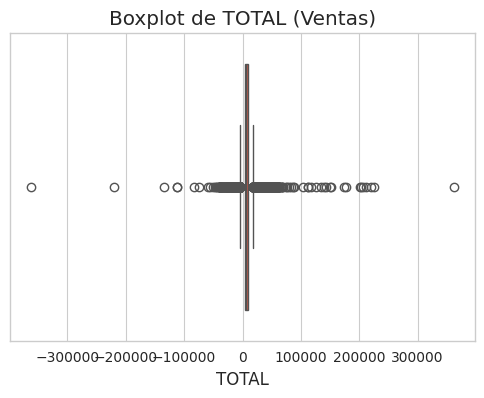

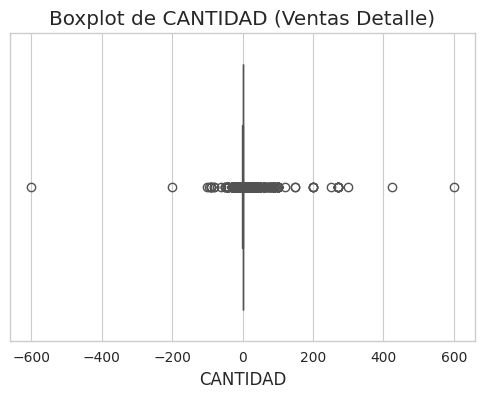

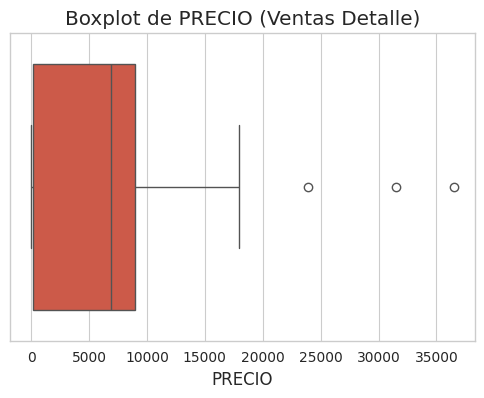

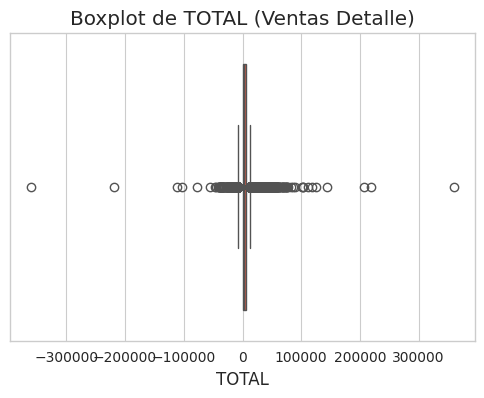

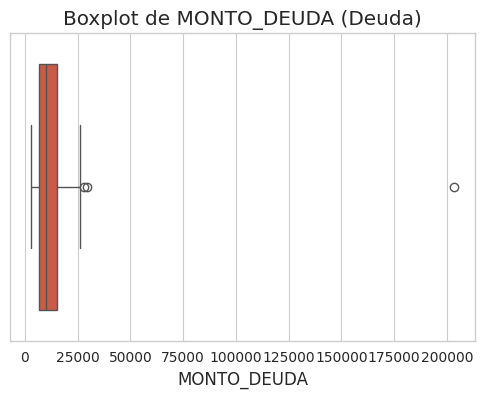

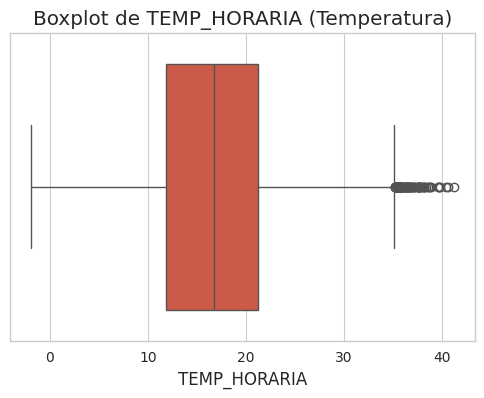

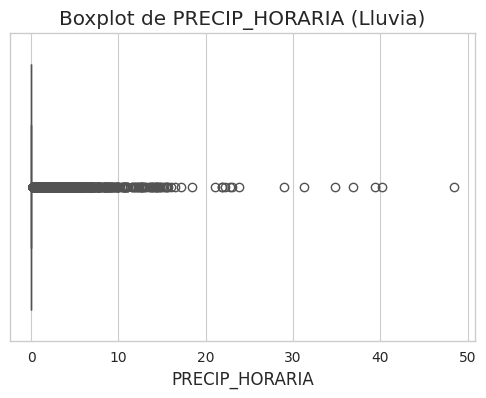

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario con dataframes reales y variables numéricas clave
dfs_vars = {
    "Ventas": (df_ventas, ["TOTAL"]),
    "Ventas Detalle": (df_ventas_detalle, ["CANTIDAD", "PRECIO", "TOTAL"]),
    "Deuda": (df_deuda, ["MONTO_DEUDA"]),
    "Temperatura": (df_temp, ["TEMP_HORARIA"]),
    "Lluvia": (df_lluvia, ["PRECIP_HORARIA"])
}

# Recorremos cada dataset y graficamos boxplots para detectar outliers
for nombre, (df, variables) in dfs_vars.items():
    for var in variables:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=var)
        plt.title(f"Boxplot de {var} ({nombre})")
        plt.show()

En esta etapa solo se detectan los outliers, sin eliminarlos ni transformarlos.  
Se observa que:

- **Ventas (`TOTAL`)**: existen facturas con montos muy superiores al promedio, probablemente de clientes mayoristas o compras en grandes volúmenes.
- **Detalle de ventas (`CANTIDAD`, `PRECIO`, `TOTAL`)**: la dispersión es alta, especialmente en `CANTIDAD`, lo que refleja diferencias entre clientes finales (pocas unidades) y comercios (volúmenes grandes).
- **Deuda (`MONTO_DEUDA`)**: algunos clientes presentan deudas muy superiores al resto, que pueden influir en la predicción de fuga.
- **Temperatura y lluvia**: aparecen valores extremos esperables (ej. 41 °C o lluvias muy intensas), pero corresponden a fenómenos climáticos reales y no necesariamente a errores.

👉 El tratamiento definitivo de outliers se realizará en la etapa de construcción del dataset final, diferenciando por **segmento de cliente, producto y unidad de medida**.

##**🛠️ 4- Feature Engineering**

###*4.1 Filtrado de facturas canceladas por notas de crédito*

Se define una función que elimina del dataset de ventas aquellas transacciones donde exista una nota de crédito que anula una factura con el mismo monto absoluto para un cliente dado, ya que se cancelan mutuamente y no representan compras reales.

In [281]:
# Normalizar strings y quitar decimales
df_ventas['DOCUMENTO'] = df_ventas['DOCUMENTO'].astype(str).str.strip().str.upper()
df_ventas['COMPROBANTE'] = df_ventas['COMPROBANTE'].astype(str).str.replace('.0','',regex=False)
df_ventas['FACTURA_AFECTADA'] = df_ventas['FACTURA_AFECTADA'].astype(str).str.replace('.0','',regex=False)
df_ventas['TIPO_NC'] = df_ventas['TIPO_NC'].astype(str).str.strip().str.upper()

# NC Anula RNCREDEF
nc_rncredef = df_ventas[(df_ventas['TIPO_NC'] == 'NC ANULA') & (df_ventas['DOCUMENTO'] == 'RNCREDEF')]
facturas_rncredef = df_ventas[(df_ventas['DOCUMENTO'] == 'RFACEF') & (df_ventas['COMPROBANTE'].isin(nc_rncredef['FACTURA_AFECTADA']))]

# NC Anula RNCREDTK
nc_rncredtk = df_ventas[(df_ventas['TIPO_NC'] == 'NC ANULA') & (df_ventas['DOCUMENTO'] == 'RNCREDTK')]
facturas_rncredtk = df_ventas[(df_ventas['DOCUMENTO'] == 'RFACTK') & (df_ventas['COMPROBANTE'].isin(nc_rncredtk['FACTURA_AFECTADA']))]

# Unir índices a eliminar
indices_a_eliminar = list(nc_rncredef.index) + list(facturas_rncredef.index) + list(nc_rncredtk.index) + list(facturas_rncredtk.index)

# Filtrar DataFrame
df_ventas_filtrado = df_ventas.drop(index=indices_a_eliminar)

df_canceladas = df_ventas.loc[indices_a_eliminar]

# Resumen
print("Filas originales:", len(df_ventas))
print("Filas eliminadas:", len(indices_a_eliminar))
print("Filas finales:", len(df_ventas_filtrado))

Filas originales: 32594
Filas eliminadas: 3683
Filas finales: 28911


### *4.2 Frecuencia de compras y fechas clave*

Se calcula la cantidad de compras, la fecha de la primera y última compra y la cantidad de días en los que se compró.

In [282]:
# --- 1. Cantidad de compras reales (TOTAL > 0)
compras_reales = df_ventas_filtrado[df_ventas_filtrado['TOTAL'] > 0].groupby('CLIENTE').agg({
    'TOTAL': 'count'
}).reset_index()
compras_reales.rename(columns={'TOTAL':'CANTIDAD_COMPRAS_REALES'}, inplace=True)

# --- 2. Cantidad total de facturas (todos los tipos RFACEF y RFACTK)
facturas_totales = df_ventas_filtrado[df_ventas_filtrado['DOCUMENTO'].isin(['RFACEF','RFACTK'])].groupby('CLIENTE').agg({
    'COMPROBANTE': 'nunique'
}).reset_index()
facturas_totales.rename(columns={'COMPROBANTE':'CANTIDAD_FACTURAS_TOTALES'}, inplace=True)

# --- 3. Fechas considerando todas las facturas (TOTAL > 0 o = 0)
fechas_todas = df_ventas_filtrado[df_ventas_filtrado['DOCUMENTO'].isin(['RFACEF','RFACTK'])].groupby('CLIENTE').agg({
    'FECHA': ['min', 'max', 'nunique']
}).reset_index()
fechas_todas.columns = ['CLIENTE', 'FECHA_PRIMERA', 'FECHA_ULTIMA', 'DIAS_CONSUMO']

# --- 4. Merge todo
ventas_fecha = facturas_totales.merge(compras_reales, on='CLIENTE', how='left')
ventas_fecha = ventas_fecha.merge(fechas_todas, on='CLIENTE', how='left')
ventas_fecha['RANGO_DIAS'] = (ventas_fecha['FECHA_ULTIMA'] - ventas_fecha['FECHA_PRIMERA']).dt.days
ventas_fecha['COMPRAS_POR_MES'] = ventas_fecha['CANTIDAD_COMPRAS_REALES'] / (
    (ventas_fecha['RANGO_DIAS'] / 30).replace(0, 1)
)

# --- 5. Completar valores faltantes
ventas_fecha['CANTIDAD_COMPRAS_REALES'] = ventas_fecha['CANTIDAD_COMPRAS_REALES'].fillna(0)
ventas_fecha['CANTIDAD_COMPRAS_REALES'] = ventas_fecha['CANTIDAD_COMPRAS_REALES'].astype(int)

# --- 6. Diferencia y porcentaje
ventas_fecha['DIFERENCIA'] = ventas_fecha['CANTIDAD_FACTURAS_TOTALES'] - ventas_fecha['CANTIDAD_COMPRAS_REALES'].astype(float)
ventas_fecha['PORCENTAJE_DIF'] = ventas_fecha['DIFERENCIA'] / ventas_fecha['CANTIDAD_FACTURAS_TOTALES'] * 100

# --- 7. Ordenar por cliente
ventas_fecha = ventas_fecha.sort_values('CLIENTE').reset_index(drop=True)

ventas_fecha.head()

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0


### *4.3 Indicador de cliente activo*

Se define si un cliente está activo, considerando como criterio si realizó una compra dentro de los últimos 12 meses desde la última fecha del dataset.

In [283]:
# Fecha de corte (última fecha del dataset)
fecha_max = df_ventas_filtrado['FECHA'].max()

# Umbral para considerar cliente activo: últimos 12 meses
umbral_activo = fecha_max - pd.DateOffset(months=12)

# ACTIVO: si el cliente tuvo al menos una factura en los últimos 12 meses (incluye TOTAL = 0)
ventas_fecha['ACTIVO'] = ventas_fecha['FECHA_ULTIMA'] >= umbral_activo

# ACTIVO_REAL: si el cliente tuvo al menos una compra con TOTAL > 0 en los últimos 12 meses
ventas_fecha['ACTIVO_REAL'] = np.where(ventas_fecha['CANTIDAD_COMPRAS_REALES'] > 0,
                                       ventas_fecha['FECHA_ULTIMA'] >= umbral_activo,
                                       False)

### *4.4 Indicador de fuga*

Criterio: cliente en riesgo de fuga si no compró en los últimos 12 meses pero sí lo hizo en los últimos 18 meses, y fuga confirmada si no compró hace más de 18 meses.

In [284]:
# Umbral de riesgo de fuga: 12 a 18 meses
umbral_fuga = fecha_max - pd.DateOffset(months=18)

# --- Indicadores de fuga basados en facturas
ventas_fecha['RIESGO_FUGA'] = (ventas_fecha['FECHA_ULTIMA'] < umbral_activo) & \
                               (ventas_fecha['FECHA_ULTIMA'] >= umbral_fuga)
ventas_fecha['FUGA_CONFIRMADA'] = ventas_fecha['FECHA_ULTIMA'] < umbral_fuga

# --- Indicadores de fuga basados en compras reales
ventas_fecha['RIESGO_FUGA_REAL'] = np.where(
    (ventas_fecha['FECHA_ULTIMA'] < umbral_activo) &
    (ventas_fecha['FECHA_ULTIMA'] >= umbral_fuga) &
    (ventas_fecha['CANTIDAD_COMPRAS_REALES'] > 0),
    True, False
)

ventas_fecha['FUGA_CONFIRMADA_REAL'] = np.where(
    (ventas_fecha['FECHA_ULTIMA'] < umbral_fuga) &
    (ventas_fecha['CANTIDAD_COMPRAS_REALES'] > 0),
    True, False
)


### *4.5 Toneladas vendidas por cliente*

Se calcula la cantidad total de toneladas de leña compradas por cada cliente, considerando solo productos medidos en toneladas.

También se crean dos variables para poder diferenciar si el cliente compró alguna vez productos de calefacción (AST y ROL) o parrilla (DUR y COR), según los valores que aparecen en el campo FAMILIA en la tabla PRODUCTOS. De esta forma se podrá visualizar si influencia directamente en el target determinado.

In [285]:
# Asegurar consistencia en tipos de clave antes del merge
df_ventas_filtrado['DOCUMENTO'] = df_ventas_filtrado['DOCUMENTO'].astype(str)
df_ventas_filtrado['COMPROBANTE'] = df_ventas_filtrado['COMPROBANTE'].astype(str)

df_ventas_detalle['DOCUMENTO'] = df_ventas_detalle['DOCUMENTO'].astype(str)
df_ventas_detalle['COMPROBANTE'] = df_ventas_detalle['COMPROBANTE'].astype(str)

# Filtrar df_ventas_detalle para considerar solo los registros válidos de df_ventas_filtrado
df_ventas_detalle_filtrado = df_ventas_detalle.merge(
    df_ventas_filtrado[['DOCUMENTO','COMPROBANTE']],
    on=['DOCUMENTO','COMPROBANTE'],
    how='inner'
)

# Unir con df_productos para obtener la unidad de cada producto y la familia
df_ventas_detalle_filtrado = df_ventas_detalle_filtrado.merge(
    df_productos[['CODIGO_PRODUCTO', 'UNIDAD', 'FAMILIA']],
    on='CODIGO_PRODUCTO',
    how='left'
)

# Crear variables binarias según familia de producto
df_ventas_detalle_filtrado['CALEFACCION'] = df_ventas_detalle_filtrado['FAMILIA'].apply(lambda x: 1 if x in ['AST', 'ROLO'] else 0)
df_ventas_detalle_filtrado['PARRILLA'] = df_ventas_detalle_filtrado['FAMILIA'].apply(lambda x: 1 if x in ['DUR', 'COR'] else 0)

# Filtrar solo productos medidos en toneladas y excluir ajustes
productos_excluir = ['ZAJUSTE', 'ZSUBI']
df_toneladas = df_ventas_detalle_filtrado[
    (df_ventas_detalle_filtrado['UNIDAD'] == 'TON') &
    (~df_ventas_detalle_filtrado['CODIGO_PRODUCTO'].isin(productos_excluir))
].copy()

# Agrupar por cliente y sumar las toneladas y tomar max de las binarias
toneladas_cliente = df_toneladas.groupby('CLIENTE').agg({
    'CANTIDAD': 'sum',
    'CALEFACCION': 'max',
    'PARRILLA': 'max'
}).reset_index()

# Renombrar columna de toneladas
toneladas_cliente.rename(columns={'CANTIDAD': 'TONELADAS_NETAS'}, inplace=True)

toneladas_cliente

,CLIENTE,TONELADAS_NETAS,CALEFACCION,PARRILLA
0,0000001,0.200,1,1
1,0000002,8.900,1,0
2,0000021,26.800,1,1
3,0000031,1.000,1,0
4,0000059,1.500,1,0
...,...,...,...,...
4187,F1205,1.000,1,0
4188,P00255,1.500,0,1
4189,P01726,0.380,1,1
4190,P01878,44.375,1,1


### *4.6 Promedio de toneladas vendidas por compra por cliente*

Relación entre el volumen comprado en toneladas y la frecuencia de compra.

In [286]:
# Hacer merge con la cantidad de compras reales de cada cliente
df_toneladas_por_compra = toneladas_cliente.merge(
    ventas_fecha[['CLIENTE', 'CANTIDAD_COMPRAS_REALES']],
    on='CLIENTE',
    how='left'
)

# Calcular toneladas promedio por compra
df_toneladas_por_compra['TONELADAS_POR_COMPRA'] = np.where(
    df_toneladas_por_compra['CANTIDAD_COMPRAS_REALES'] > 0,
    df_toneladas_por_compra['TONELADAS_NETAS'] / df_toneladas_por_compra['CANTIDAD_COMPRAS_REALES'],
    0
)

# Opcional: rellenar NaN con 0 si un cliente no tiene compras reales
df_toneladas_por_compra['TONELADAS_POR_COMPRA'] = df_toneladas_por_compra['TONELADAS_POR_COMPRA'].fillna(0)

df_toneladas_por_compra

,CLIENTE,TONELADAS_NETAS,CALEFACCION,PARRILLA,CANTIDAD_COMPRAS_REALES,TONELADAS_POR_COMPRA
0,0000001,0.200,1,1,3,0.066667
1,0000002,8.900,1,0,8,1.112500
2,0000021,26.800,1,1,20,1.340000
3,0000031,1.000,1,0,2,0.500000
4,0000059,1.500,1,0,2,0.750000
...,...,...,...,...,...,...
4187,F1205,1.000,1,0,2,0.500000
4188,P00255,1.500,0,1,3,0.500000
4189,P01726,0.380,1,1,1,0.380000
4190,P01878,44.375,1,1,23,1.929348


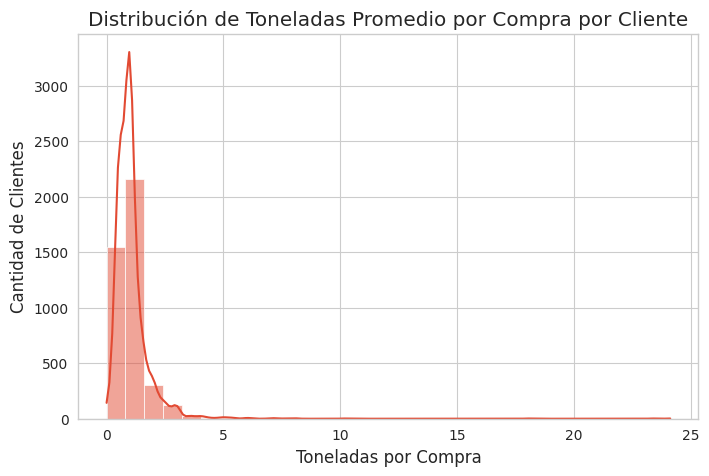

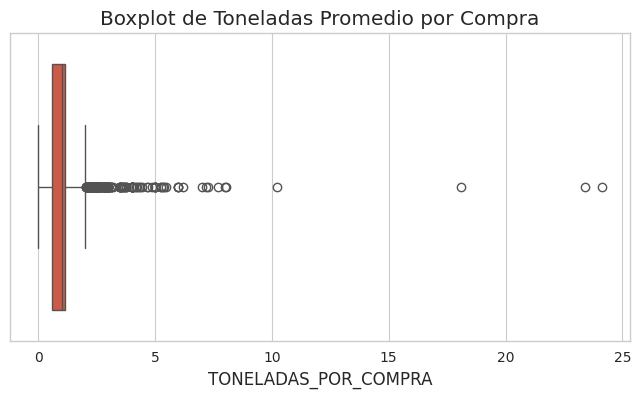

In [287]:
import matplotlib.pyplot as plt

# Histograma con KDE para ver la distribución
plt.figure(figsize=(8,5))
sns.histplot(df_toneladas_por_compra['TONELADAS_POR_COMPRA'], bins=30, kde=True)
plt.title("Distribución de Toneladas Promedio por Compra por Cliente")
plt.xlabel("Toneladas por Compra")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Boxplot para identificar posibles outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df_toneladas_por_compra['TONELADAS_POR_COMPRA'])
plt.title("Boxplot de Toneladas Promedio por Compra")
plt.show()

Interpretación:

La mayoría de los clientes concentra sus compras en bajos volúmenes por transacción (ej. fracciones de tonelada).

Existen algunos clientes con valores altos de toneladas promedio por compra, que podrían corresponder a clientes industriales o distribuidores.

Estos casos aparecen como outliers en el boxplot, pero en este contexto pueden ser informativos más que errores.

Antes del modelado, será importante escalar esta variable para que no desbalancee el peso frente a otras (ej. frecuencia de compra o satisfacción).

### *4.7 Montos totales por cliente*

Se calcula el monto total gastado por cada cliente, incluyendo el monto real (neto), el facturado sin devoluciones y el monto devuelto por notas de crédito.

In [288]:
# Monto neto: sumatoria de TOTAL considerando solo ventas reales (TOTAL > 0)
monto_neto = df_ventas_filtrado[df_ventas_filtrado['TOTAL'] != 0].groupby('CLIENTE').agg({
    'TOTAL': 'sum'
}).reset_index().rename(columns={'TOTAL': 'MONTO_NETO'})

# Monto facturado sin NC: sumatoria de TOTAL de facturas (RFACEF, RFACTK)
monto_facturado = df_ventas_filtrado[df_ventas_filtrado['DOCUMENTO'].isin(['RFACEF','RFACTK'])].groupby('CLIENTE').agg({
    'TOTAL': 'sum'
}).reset_index().rename(columns={'TOTAL': 'MONTO_FACTURADO'})

# Monto devuelto por NC
monto_nc = df_ventas_filtrado[df_ventas_filtrado['TOTAL'] < 0].groupby('CLIENTE').agg({
    'TOTAL': 'sum'
}).reset_index().rename(columns={'TOTAL': 'MONTO_DEVUELTO'})

# Merge de todos los montos
montos_cliente = monto_neto.merge(monto_facturado, on='CLIENTE', how='left')
montos_cliente = montos_cliente.merge(monto_nc, on='CLIENTE', how='left')

# Rellenar NaN con 0
montos_cliente[['MONTO_NETO','MONTO_FACTURADO','MONTO_DEVUELTO']] = montos_cliente[
    ['MONTO_NETO','MONTO_FACTURADO','MONTO_DEVUELTO']
].fillna(0)

# Convertir a float
montos_cliente[['MONTO_NETO','MONTO_FACTURADO','MONTO_DEVUELTO']] = montos_cliente[[
    'MONTO_NETO','MONTO_FACTURADO','MONTO_DEVUELTO'
]].astype(float)


montos_cliente

,CLIENTE,MONTO_NETO,MONTO_FACTURADO,MONTO_DEVUELTO
0,0000001,2397.0,2397.0,0.0
1,0000002,61199.0,61199.0,0.0
2,0000021,205420.0,205420.0,0.0
3,0000031,8750.0,8750.0,0.0
4,0000059,11375.0,11375.0,0.0
...,...,...,...,...
4268,F1206,488.0,488.0,0.0
4269,P00255,15488.0,15488.0,0.0
4270,P01726,3838.0,3838.0,0.0
4271,P01878,700821.0,904260.0,-203439.0


In [289]:
montos_cliente.describe()

,MONTO_NETO,MONTO_FACTURADO,MONTO_DEVUELTO
count,4.273000e+03,4.273000e+03,4273.000000
mean,5.669808e+04,5.729125e+04,-593.163000
std,1.574216e+05,1.587963e+05,4124.994407
min,-7.000000e+02,0.000000e+00,-203439.000000
25%,9.750000e+03,9.775000e+03,0.000000
50%,2.354500e+04,2.389800e+04,0.000000
75%,6.487500e+04,6.541300e+04,0.000000
max,7.399818e+06,7.428334e+06,0.000000


### *4.8 Satisfacción final promedio en reclamos*

Promedio del nivel de satisfacción reportado en reclamos por cada cliente.

In [290]:
# --- 1. Satisfacción promedio considerando todos los reclamos
satisfaccion_total = df_reclamos2024.groupby('CLIENTE')['SATISFACCION'].mean().reset_index(
    name='SATISFACCION_TOTAL'
)

# --- 2. Satisfacción promedio considerando solo NC (no conformidades)
df_reclamos_nc = df_reclamos2024[df_reclamos2024['RECLAMO'] == 'NC']
satisfaccion_nc = df_reclamos_nc.groupby('CLIENTE')['SATISFACCION'].mean().reset_index(
    name='SATISFACCION_NC'
)

# --- 3. Merge de ambas métricas
satisfaccion_cliente = satisfaccion_total.merge(
    satisfaccion_nc,
    on='CLIENTE',
    how='left'  # Si un cliente no tiene NC, quedará NaN
)

# --- 4. Opcional: reemplazar NaN por algún valor (por ejemplo, 0 o la satisfacción total)
satisfaccion_cliente['SATISFACCION_NC'] = satisfaccion_cliente['SATISFACCION_NC'].fillna(
    satisfaccion_cliente['SATISFACCION_TOTAL']
)

satisfaccion_cliente

,CLIENTE,SATISFACCION_TOTAL,SATISFACCION_NC
0,0000001,4.000000,4.0
1,0000400,5.000000,5.0
2,0000445,5.000000,5.0
3,0000525,3.333333,4.0
4,0001610,4.000000,4.0
...,...,...,...
116,0013381,4.000000,4.0
117,0013406,3.000000,3.0
118,0013419,5.000000,5.0
119,0013435,4.000000,4.0


###*4.9 Valoraciones promedio de encuesta*

Se calcula un índice promedio de satisfacción a partir de las valoraciones individuales de cada aspecto del servicio.

In [291]:
# Seleccionar columnas de interés
columnas_encuesta = ['CLIENTE', 'ATENCION', 'CALIDAD']

# Agrupar por cliente y calcular promedio de estas columnas
encuesta_promedio = df_encuesta2024[columnas_encuesta].groupby('CLIENTE').mean().reset_index()

# Crear una columna combinada si querés un índice general
encuesta_promedio['SATISFACCION_ENCUESTA'] = encuesta_promedio[['ATENCION', 'CALIDAD']].mean(axis=1)

### *4.10 Variables de clima por cliente*

En este bloque combinamos los datos horarios de temperatura y lluvia en un único dataframe y luego los agregamos a nivel diario, calculando la temperatura promedio diaria y la precipitación total diaria. Esto permite trabajar con un nivel de granularidad más manejable para análisis posteriores.

In [292]:
# Merge de temperatura y lluvia por fecha
df_clima = pd.merge(df_temp, df_lluvia, on='FECHA', how='outer')

# Agregar a nivel diario
df_clima_diario = df_clima.groupby(df_clima['FECHA'].dt.date).agg({
    'TEMP_HORARIA': 'mean',  # temperatura promedio diaria
    'PRECIP_HORARIA': 'sum'         # lluvia total diaria
}).reset_index()

# Renombrar columna de fecha
df_clima_diario.rename(columns={'FECHA':'FECHA'}, inplace=True)

df_clima_diario.describe()

,TEMP_HORARIA,PRECIP_HORARIA
count,2062.000000,2062.000000
mean,16.703181,2.377740
std,5.543215,8.137244
min,2.423529,0.000000
25%,12.202083,0.000000
50%,17.022917,0.000000
75%,21.183333,0.200000
max,31.787500,130.800000


Una vez obtenido el clima diario, se calcula un resumen mensual por año y mes, usando la temperatura promedio y la precipitación total de cada mes. Este dataframe mensual (df_clima_mensual) facilitará el merge con los datos de ventas o clientes, alineando la información climática con el período de facturación o entrega.

In [293]:
# Asegurarse que FECHA es datetime
df_clima_diario['FECHA'] = pd.to_datetime(df_clima_diario['FECHA'])

# Extraer año y mes
df_clima_diario['AÑO'] = df_clima_diario['FECHA'].dt.year
df_clima_diario['MES'] = df_clima_diario['FECHA'].dt.month

# Agrupar por mes y año
df_clima_mensual = df_clima_diario.groupby(['AÑO', 'MES']).agg({
    'TEMP_HORARIA': 'mean',  # promedio mensual
    'PRECIP_HORARIA': 'sum'          # total mensual
}).reset_index()

# Renombrar columnas para mayor claridad
df_clima_mensual.rename(columns={
    'TEMP_HORARIA': 'TEMP_PROM_MENSUAL',
    'PRECIP_HORARIA': 'LLUVIA_TOTAL_MENSUAL'
}, inplace=True)

df_clima_mensual.head()

,AÑO,MES,TEMP_PROM_MENSUAL,LLUVIA_TOTAL_MENSUAL
0,2020,1,22.748522,33.8
1,2020,2,22.743665,44.6
2,2020,3,22.547920,86.2
3,2020,4,17.675599,125.8
4,2020,5,14.578239,84.8


Se crea otra variable para el clima basado en los 7 días posteriores a un día de frío, ya que se puede asumir que puede afectar en picos de venta o influir en la fuga de cliente si un día llovió mucho por la leña le llegó por fuera de los estándares de calidad, influyendo directamente en la satisfacción de cliente. Se calcula a partir de la última fecha de compra para comprender si hay una influencia directa en la fuga de los clientes.

In [294]:
# --- 1. Unir clima con ventas a nivel mensual (EDA, para visualización general)
ventas_mensual = df_ventas_filtrado.copy()
ventas_mensual['AÑO'] = ventas_mensual['FECHA'].dt.year
ventas_mensual['MES'] = ventas_mensual['FECHA'].dt.month

ventas_mensual = ventas_mensual.groupby(['AÑO','MES']).agg({
    'TOTAL': 'sum',
    'COMPROBANTE': 'count'
}).reset_index().rename(columns={
    'TOTAL': 'VENTAS_TOTALES',
    'COMPROBANTE': 'CANTIDAD_FACTURAS'
})

# Merge con clima mensual
ventas_clima_mensual = pd.merge(
    ventas_mensual,
    df_clima_mensual,
    on=['AÑO','MES'],
    how='left'
)

# --- 2. Features de clima en los últimos 7 días antes de la última compra (para modelado predictivo)
def clima_ultimo_dia(fecha, df_clima, dias=7):
    ventana = df_clima[(df_clima['FECHA'] < fecha) &
                       (df_clima['FECHA'] >= fecha - pd.Timedelta(days=dias))]
    return pd.Series({
        'TEMP_7DIAS_ULTIMA': ventana['TEMP_HORARIA'].mean(),
        'LLUVIA_7DIAS_ULTIMA': ventana['PRECIP_HORARIA'].sum()
    })

# Aplicar por cliente usando la fecha de última compra
clima_ultimo_cliente = ventas_fecha.apply(
    lambda row: clima_ultimo_dia(row['FECHA_ULTIMA'], df_clima_diario, dias=7),
    axis=1
)

# Concatenar directamente al df final (ventas_fecha)
ventas_fecha = pd.concat([ventas_fecha.reset_index(drop=True), clima_ultimo_cliente.reset_index(drop=True)], axis=1)

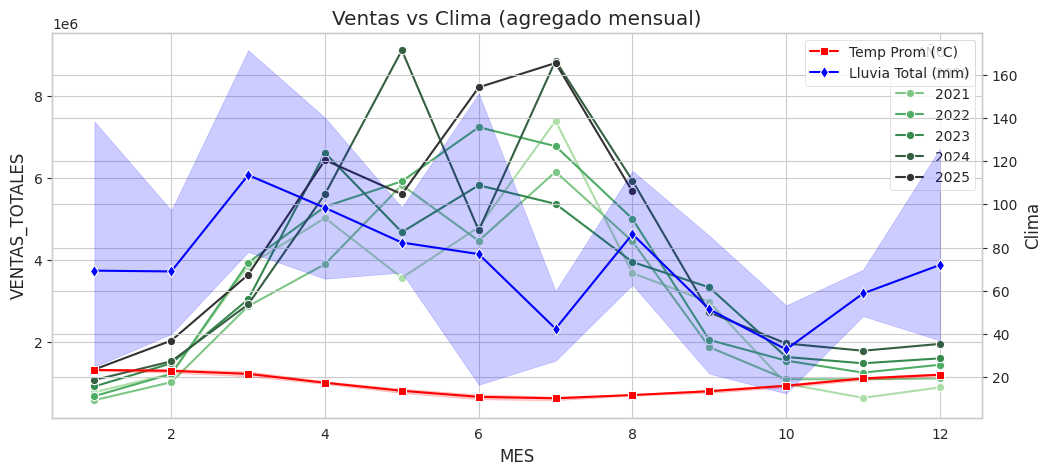

In [295]:
# --- 1. Relación entre clima y ventas totales (agregado mensual) ---
plt.figure(figsize=(12,5))

# Eje principal: ventas
sns.lineplot(
    data=ventas_clima_mensual,
    x='MES',
    y='VENTAS_TOTALES',
    hue='AÑO',
    marker='o',
    palette='Greens_d'
)

# Eje secundario: clima
ax2 = plt.gca().twinx()

sns.lineplot(
    data=ventas_clima_mensual,
    x='MES',
    y='TEMP_PROM_MENSUAL',
    color='red',
    marker='s',
    ax=ax2,
    label='Temp Prom (°C)'
)

sns.lineplot(
    data=ventas_clima_mensual,
    x='MES',
    y='LLUVIA_TOTAL_MENSUAL',
    color='blue',
    marker='d',
    ax=ax2,
    label='Lluvia Total (mm)'
)

# Etiquetas y título
plt.title("Ventas vs Clima (agregado mensual)")
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
ax2.set_ylabel("Clima")
ax2.legend(loc="upper right")
plt.show()

Se puede observar que la temperatura influye en las ventas.

### *4.11 Estacionalidad de compra*

Objetivo: identificar si la compra/factura cae dentro de la zafra (marzo a septiembre)

In [296]:
# Crear conjuntos de clientes según compras históricas
clientes_zafra = df_ventas_filtrado[df_ventas_filtrado['FECHA'].dt.month.between(3, 9)]['CLIENTE'].unique()
clientes_fuera = df_ventas_filtrado[~df_ventas_filtrado['FECHA'].dt.month.between(3, 9)]['CLIENTE'].unique()

# Variable binaria: 1 si compró en ambos periodos, 0 si no
ventas_fecha['COMPRA_EN_AMBOS_PERIODOS'] = ventas_fecha['CLIENTE'].apply(
    lambda x: 1 if (x in clientes_zafra) and (x in clientes_fuera) else 0
)

# Mantener tu variable ZAFRA original basada en la última compra
ventas_fecha['MES_ULTIMA_COMPRA'] = ventas_fecha['FECHA_ULTIMA'].dt.month
ventas_fecha['ZAFRA'] = ventas_fecha['MES_ULTIMA_COMPRA'].apply(lambda x: 1 if 3 <= x <= 9 else 0)

# Visualizar resultado
ventas_fecha

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,ACTIVO_REAL,RIESGO_FUGA,FUGA_CONFIRMADA,RIESGO_FUGA_REAL,FUGA_CONFIRMADA_REAL,TEMP_7DIAS_ULTIMA,LLUVIA_7DIAS_ULTIMA,COMPRA_EN_AMBOS_PERIODOS,MES_ULTIMA_COMPRA,ZAFRA
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0,...,False,False,True,False,True,12.705357,37.0,0,6,1
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0,...,False,False,True,False,True,10.816071,0.4,0,8,1
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0,...,True,False,False,False,False,11.348810,54.7,1,9,1
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0,...,False,False,True,False,True,9.296429,18.4,0,8,1
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0,...,False,False,True,False,True,11.790476,25.4,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,F1206,2,2,2024-08-31,2025-06-30,2,303,0.198020,0.0,0.0,...,True,False,False,False,False,7.094048,21.1,0,6,1
4277,P00255,3,3,2021-04-23,2024-06-28,3,1162,0.077453,0.0,0.0,...,False,True,False,True,False,11.243452,12.1,1,6,1
4278,P01726,1,1,2023-12-08,2023-12-08,1,0,1.000000,0.0,0.0,...,False,False,True,False,True,19.249405,99.7,0,12,0
4279,P01878,23,23,2021-02-23,2025-07-10,23,1598,0.431790,0.0,0.0,...,True,False,False,False,False,9.408333,0.2,1,7,1


### *4.12 Zona real más frecuente por cliente*

Identificar la zona de entrega más habitual de cada cliente, considerando direcciones alternativas (DIRECCION_ALT) cuando existan, o la zona del cliente en caso contrario.

In [297]:
# --- 1. Definir zona real por cada venta (ya lo tenés en df_ventas_filtrado)
df_ventas_filtrado['ZONA_REAL'] = np.where(
    df_ventas_filtrado['DIRECCION_ALT'].isna() | (df_ventas_filtrado['DIRECCION_ALT'] == 'N/A'),
    df_ventas_filtrado['CLIENTE'].map(df_cliente.set_index('CLIENTE')['ZONA']),
    df_ventas_filtrado['DIRECCION_ALT'].map(df_direc_alt.set_index('DIRECCION_ALT')['ZONA'])
)

# --- 2. Calcular la zona más frecuente por cliente
zona_frecuente_cliente = df_ventas_filtrado.groupby('CLIENTE')['ZONA_REAL'] \
                                           .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan) \
                                           .reset_index() \
                                           .rename(columns={'ZONA_REAL': 'ZONA_REAL_FRECUENTE'})

# --- 3. Aplicar mapping de barrios a zonas si es necesario
zona_frecuente_cliente['ZONA_REAL_FRECUENTE'] = zona_frecuente_cliente['ZONA_REAL_FRECUENTE'].map(barrios_a_zonas)

# --- 4. Merge con df_cliente
df_cliente = df_cliente.merge(zona_frecuente_cliente, on='CLIENTE', how='left')

### *4.13 Unión de todas las variables en un dataframe*

Se integran todas las métricas generadas en un único DataFrame, incluyendo variables demográficas del cliente y la creación de otras variables binarias que indican si respondió encuesta o tuvo reclamos.

In [298]:
# --- 1. Partimos de ventas_fecha, que contiene frecuencias, fechas, activo, fuga, clima y estacionalidad
df_variables_final = ventas_fecha.copy()

# --- 2. Merge con toneladas totales y variables de familia
df_variables_final = df_variables_final.merge(
    toneladas_cliente,
    on='CLIENTE',
    how='left'
)

# --- 3. Merge con toneladas por compra
df_variables_final = df_variables_final.merge(
    df_toneladas_por_compra[['CLIENTE', 'TONELADAS_POR_COMPRA']],
    on='CLIENTE',
    how='left'
)

# --- 4. Merge con montos totales, facturados y devueltos
df_variables_final = df_variables_final.merge(
    montos_cliente,
    on='CLIENTE',
    how='left'
)

# --- 5. Merge con satisfacción de reclamos
df_variables_final = df_variables_final.merge(
    satisfaccion_cliente,
    on='CLIENTE',
    how='left'
)

# --- 6. Merge con satisfacción de encuesta
df_variables_final = df_variables_final.merge(
    encuesta_promedio[['CLIENTE','SATISFACCION_ENCUESTA']],
    on='CLIENTE',
    how='left'
)

# --- 7. Variables binarias adicionales
clientes_con_reclamos = df_reclamos2024['CLIENTE'].unique()
df_variables_final['TIENE_RECLAMOS'] = df_variables_final['CLIENTE'].isin(clientes_con_reclamos).astype(int)
df_variables_final['RESPONDIO_ENCUESTA'] = df_variables_final['SATISFACCION_ENCUESTA'].notnull().astype(int)

# --- 8. Merge de información adicional de clientes
df_variables_final = df_variables_final.merge(
    df_cliente[['CLIENTE', 'SEGMENTO', 'ZONA_AGRUPADA']],
    on='CLIENTE',
    how='left'
)

df_variables_final = df_variables_final.merge(
    df_deuda[['CLIENTE', 'MONTO_DEUDA']],
    on='CLIENTE',
    how='left'
)

# --- 9. Merge de zona frecuente de clientes
df_variables_final = df_variables_final.merge(zona_frecuente_cliente, on='CLIENTE', how='left')

# --- 10. Rellenar NaN con 0 para variables numéricas
numericas = [
    'CANTIDAD_FACTURAS_TOTALES','CANTIDAD_COMPRAS_REALES','DIAS_CONSUMO','RANGO_DIAS','COMPRAS_POR_MES',
    'DIFERENCIA','PORCENTAJE_DIF','TEMP_PROM_7DIAS','LLUVIA_7DIAS',
    'TONELADAS_NETAS','CALEFACCION','PARRILLA','TONELADAS_POR_COMPRA',
    'MONTO_NETO','MONTO_FACTURADO','MONTO_DEVUELTO',
    'SATISFACCION_TOTAL','SATISFACCION_NC','SATISFACCION_ENCUESTA'
]

for col in numericas:
    if col in df_variables_final.columns:
        df_variables_final[col] = df_variables_final[col].fillna(0)

# --- 11. Convertir columnas booleanas a int (0/1)
booleanas = [
    'ACTIVO','ACTIVO_REAL','RIESGO_FUGA','FUGA_CONFIRMADA',
    'RIESGO_FUGA_REAL','FUGA_CONFIRMADA_REAL','COMPRA_EN_AMBOS_PERIODOS','ZAFRA',
    'TIENE_RECLAMOS','RESPONDIO_ENCUESTA'
]

for col in booleanas:
    if col in df_variables_final.columns:
        df_variables_final[col] = df_variables_final[col].astype(int)

# --- 12. Ordenar por CLIENTE
df_variables_final = df_variables_final.sort_values('CLIENTE').reset_index(drop=True)

# --- 13. Revisar valores faltantes
df_variables_final.isna().sum()

,0
CLIENTE,0
CANTIDAD_FACTURAS_TOTALES,0
CANTIDAD_COMPRAS_REALES,0
FECHA_PRIMERA,0
FECHA_ULTIMA,0
DIAS_CONSUMO,0
RANGO_DIAS,0
COMPRAS_POR_MES,0
DIFERENCIA,0
PORCENTAJE_DIF,0


In [299]:
# Lista de columnas categóricas con posibles NaN
columnas_categoricas = ["ZONA_AGRUPADA", "SEGMENTO", "ZONA_REAL_FRECUENTE"]

# Reemplazar NaN por "Desconocido"
df_variables_final[columnas_categoricas] = df_variables_final[columnas_categoricas].fillna("DESCONOCIDO")

# Verificar que ya no haya NaN en esas columnas
print(df_variables_final[columnas_categoricas].isna().sum())
print(df_variables_final[columnas_categoricas].head())

ZONA_AGRUPADA          0
SEGMENTO               0
ZONA_REAL_FRECUENTE    0
dtype: int64
  ZONA_AGRUPADA     SEGMENTO ZONA_REAL_FRECUENTE
0       ZONA 10  SIN ASIGNAR             ZONA 10
1        ZONA 1       NORMAL              ZONA 1
2        ZONA 1       NORMAL              ZONA 1
3        ZONA 1       NORMAL              ZONA 1
4        ZONA 1       NORMAL              ZONA 1


In [300]:
df_variables_final

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,MONTO_DEVUELTO,SATISFACCION_TOTAL,SATISFACCION_NC,SATISFACCION_ENCUESTA,TIENE_RECLAMOS,RESPONDIO_ENCUESTA,SEGMENTO,ZONA_AGRUPADA,MONTO_DEUDA,ZONA_REAL_FRECUENTE
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0,...,0.0,4.0,4.0,0.0,1,0,SIN ASIGNAR,ZONA 10,NaN,ZONA 10
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0,...,0.0,0.0,0.0,3.0,0,1,NORMAL,ZONA 1,NaN,ZONA 1
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,F1206,2,2,2024-08-31,2025-06-30,2,303,0.198020,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 4,NaN,ZONA 4
4277,P00255,3,3,2021-04-23,2024-06-28,3,1162,0.077453,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 2,NaN,ZONA 6
4278,P01726,1,1,2023-12-08,2023-12-08,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4279,P01878,23,23,2021-02-23,2025-07-10,23,1598,0.431790,0.0,0.0,...,-203439.0,0.0,0.0,0.0,0,0,CANJE,ZONA 1,NaN,ZONA 1


## **📊 5- EDA**

El EDA se realiza en esta etapa para incluir no solo las variables originales sino también las creadas en el Feature Engineering, lo que permite identificar patrones más relevantes y obtener conclusiones más útiles para el modelado.

In [301]:
# Estilo para utilizar en gráficos
plt.style.use('ggplot')
sns.set_style('whitegrid')

### *5.1 Análisis univariado*

In [302]:
df_variables_final

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,MONTO_DEVUELTO,SATISFACCION_TOTAL,SATISFACCION_NC,SATISFACCION_ENCUESTA,TIENE_RECLAMOS,RESPONDIO_ENCUESTA,SEGMENTO,ZONA_AGRUPADA,MONTO_DEUDA,ZONA_REAL_FRECUENTE
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0,...,0.0,4.0,4.0,0.0,1,0,SIN ASIGNAR,ZONA 10,NaN,ZONA 10
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0,...,0.0,0.0,0.0,3.0,0,1,NORMAL,ZONA 1,NaN,ZONA 1
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,F1206,2,2,2024-08-31,2025-06-30,2,303,0.198020,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 4,NaN,ZONA 4
4277,P00255,3,3,2021-04-23,2024-06-28,3,1162,0.077453,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 2,NaN,ZONA 6
4278,P01726,1,1,2023-12-08,2023-12-08,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4279,P01878,23,23,2021-02-23,2025-07-10,23,1598,0.431790,0.0,0.0,...,-203439.0,0.0,0.0,0.0,0,0,CANJE,ZONA 1,NaN,ZONA 1


####  *5.1.1 Distribución de clientes activos vs. inactivos*

Este gráfico muestra el porcentaje de clientes activos e inactivos. Es útil para entender si la base está concentrada en clientes que siguen comprando o si hay una cantidad significativa de clientes que han dejado de operar.

/tmp/ipython-input-4011542777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=temp_df, x='ACTIVO_LABEL', palette='Greens')


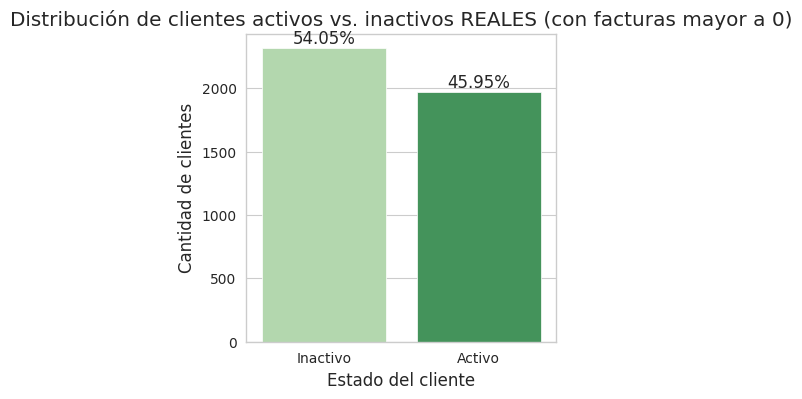

ACTIVO
0    0.540061
1    0.459939
Name: proportion, dtype: float64


In [303]:
# Crear DataFrame temporal con etiquetas legibles
temp_df = df_variables_final.copy()
temp_df['ACTIVO_LABEL'] = temp_df['ACTIVO_REAL'].map({1: 'Activo', 0: 'Inactivo'})

plt.figure(figsize=(4,4))
ax = sns.countplot(data=temp_df, x='ACTIVO_LABEL', palette='Greens')

plt.title('Distribución de clientes activos vs. inactivos REALES (con facturas mayor a 0)')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')

# Agregar porcentaje sobre cada barra
total = len(temp_df)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + total*0.01, porcentaje, ha='center', fontsize=12)

plt.show()

# Proporción en consola
print(df_variables_final['ACTIVO'].value_counts(normalize=True))

/tmp/ipython-input-3273963105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=temp_df, x='ACTIVO', palette='Greens')


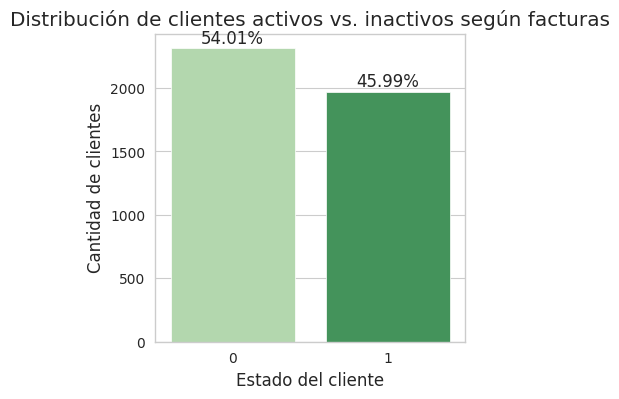

ACTIVO
0    0.540061
1    0.459939
Name: proportion, dtype: float64


In [304]:
# Crear DataFrame temporal con etiquetas legibles
temp_df = df_variables_final.copy()
temp_df['ACTIVO_LABEL'] = temp_df['ACTIVO'].map({1: 'Activo', 0: 'Inactivo'})

plt.figure(figsize=(4,4))
ax = sns.countplot(data=temp_df, x='ACTIVO', palette='Greens')

plt.title('Distribución de clientes activos vs. inactivos según facturas')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')

# Agregar porcentaje sobre cada barra
total = len(temp_df)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + total*0.01, porcentaje, ha='center', fontsize=12)

plt.show()

# Proporción en consola
print(df_variables_final['ACTIVO'].value_counts(normalize=True))

El análisis muestra que casi el 46% de los clientes se encuentran activos, es decir, realizaron al menos una compra dentro de los últimos 12 meses; teniendo una cantidad significativa de clientes que han dejado de comprar.

####  *5.1.2 Distribución de clientes por zona*

Aquí vemos cuáles son las zonas con mayor cantidad de clientes. Esto puede ayudar a focalizar acciones comerciales o ver si la fuga está concentrada en ciertas regiones.

/tmp/ipython-input-1950638316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_variables_final, x='ZONA_AGRUPADA', palette=paleta_invertida, order=df_variables_final['ZONA_AGRUPADA'].value_counts().index)


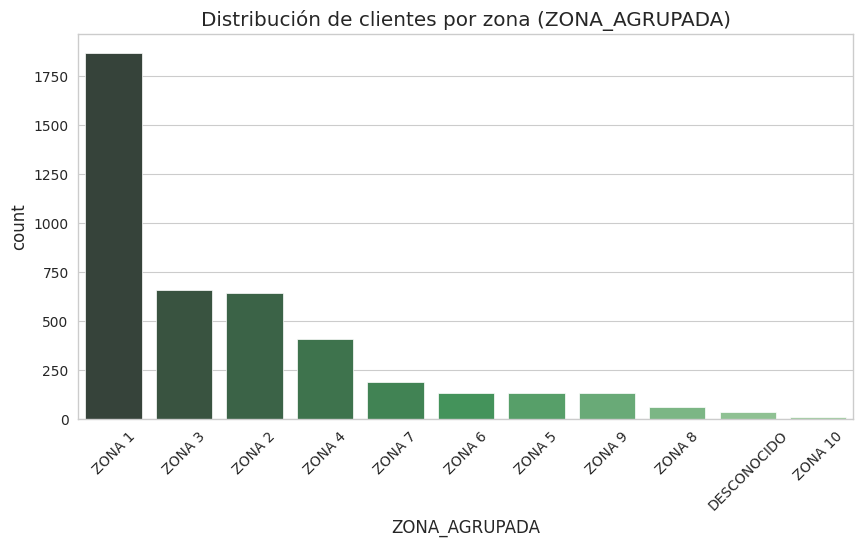

/tmp/ipython-input-1950638316.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_variables_final, x='ZONA_REAL_FRECUENTE', palette=paleta_invertida, order=df_variables_final['ZONA_REAL_FRECUENTE'].value_counts().index)


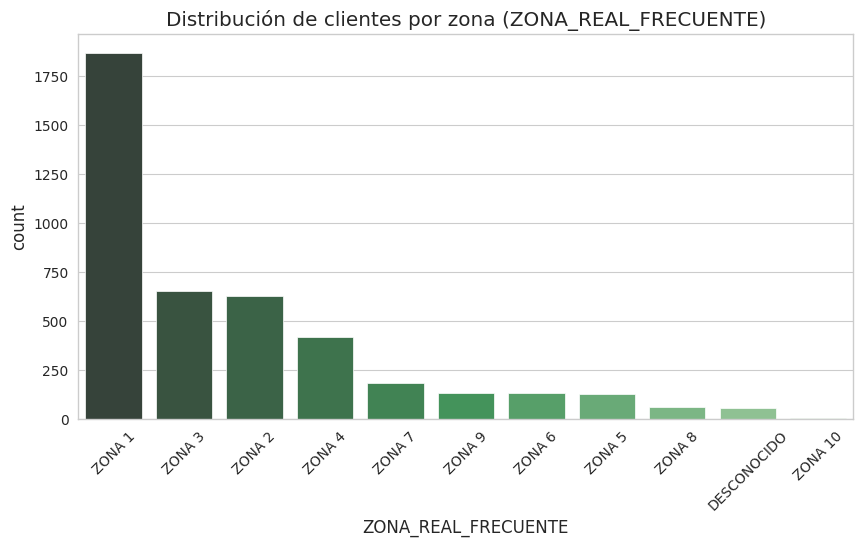

In [305]:
# Crear paleta invertida (de oscuro a claro)
paleta_invertida = sns.color_palette('Greens_d', n_colors=11)[::-1]

# ZONA_AGRUPADA del cliente
plt.figure(figsize=(10,5))
sns.countplot(data=df_variables_final, x='ZONA_AGRUPADA', palette=paleta_invertida, order=df_variables_final['ZONA_AGRUPADA'].value_counts().index)
plt.title("Distribución de clientes por zona (ZONA_AGRUPADA)")
plt.xticks(rotation=45)
plt.show()

# ZONA_REAL_FRECUENTE del cliente incluyendo direcciones alternativas
plt.figure(figsize=(10,5))
sns.countplot(data=df_variables_final, x='ZONA_REAL_FRECUENTE', palette=paleta_invertida, order=df_variables_final['ZONA_REAL_FRECUENTE'].value_counts().index)
plt.title("Distribución de clientes por zona (ZONA_REAL_FRECUENTE)")
plt.xticks(rotation=45)
plt.show()

Al observar la procedencia geográfica de los clientes, se evidencia que las zonas con mayor concentración de clientes en ambos gráficos son:

- ZONA 1
- ZONA 3
- ZONA 2
- ZONA 4
- ZONA 7

####  *5.1.3 Distribución de la cantidad de compras por cliente*

Este boxplot nos permite identificar la distribución de compras y detectar valores atípicos. Clientes con muchas compras podrían tener un comportamiento diferente al resto, lo cual es útil para segmentarlos.

In [306]:
# Cálculo del IQR
q1 = df_variables_final['CANTIDAD_COMPRAS_REALES'].quantile(0.25)
q3 = df_variables_final['CANTIDAD_COMPRAS_REALES'].quantile(0.75)
iqr = q3 - q1

# Punto donde empiezan los outliers
limite_superior = q3 + 1.5 * iqr
print(f'Outliers empiezan a partir de: {limite_superior:.2f}')

Outliers empiezan a partir de: 16.00


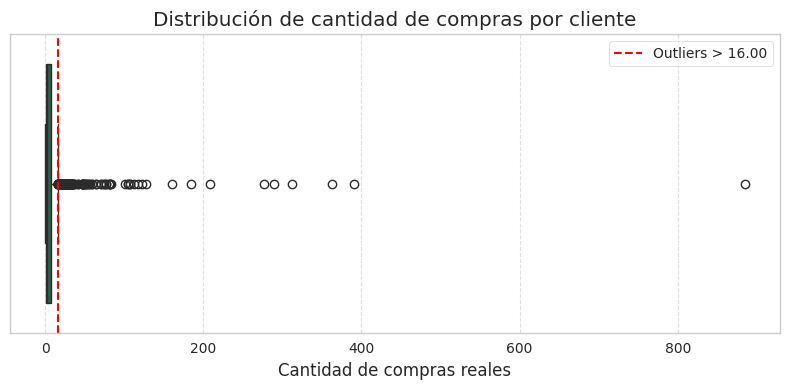

In [307]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_variables_final, x='CANTIDAD_COMPRAS_REALES', color='#276749')

# Linea vertical en el punto donde comienzan los outliers
plt.axvline(limite_superior, color='red', linestyle='--', label=f'Outliers > {limite_superior:.2f}')
plt.legend()

plt.title('Distribución de cantidad de compras por cliente')
plt.xlabel('Cantidad de compras reales')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

El análisis de la cantidad de compras por cliente muestra que la mayoría realiza menos de 16 compras durante el período analizado. A partir de ese punto, se consideran outliers, es decir, clientes con un comportamiento de compra significativamente superior al promedio.

Esto sugiere que hay distintos comportamientos de compra debido a los distintos segmentos de clientes que la empresa tiene, dado a que los mismos presentan otras necesidades de compra (Ejemplo: El consumo de los clientes finales no es de la misma magnitud que de un restaurante).

####  *5.1.4 Distribución de tipos de segmentación*

Esta visualización analiza la distribución de clientes según su tipo de segmentación. La columna “SEGMENTADOR” indica categorías comerciales como panaderías, estufas, clubes, pizzerías, entre otros. Analizar esta variable permite entender a qué tipo de cliente apunta más la empresa y detectar perfiles predominantes en la cartera.

In [308]:
df_variables_final['SEGMENTO'].value_counts()

,count
SEGMENTO,
NORMAL,3968
SIN ASIGNAR,41
DESCONOCIDO,39
COLABORADOR,37
CED,34
PANADERIAS,27
PIZZERIAS,27
CLUBITAU,22
CLUBES,18


/tmp/ipython-input-2001665734.py:11: UserWarning: 
The palette list has fewer values (11) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=segmentador_counts.index, hue=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_segmentos, legend=False)


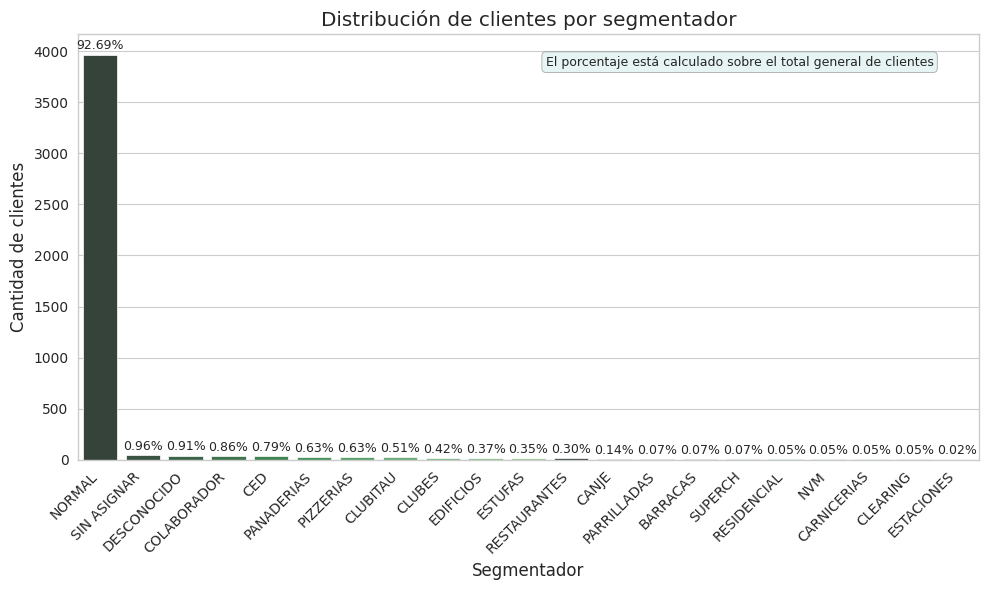

In [309]:
# Variable para el gráfico
segmentador_counts = df_variables_final['SEGMENTO'].value_counts().sort_values(ascending=False)

# Total general de clientes (no solo filtrados)
total_general = len(df_variables_final)

# Usar solo los primeros 21 colores para evitar warnings
paleta_segmentos = paleta_invertida[:len(segmentador_counts)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segmentador_counts.index, hue=segmentador_counts.index, y=segmentador_counts.values, palette=paleta_segmentos, legend=False)
plt.title('Distribución de clientes por segmentador')
plt.xlabel('Segmentador')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')

# Porcentaje basado en el total general
for i, value in enumerate(segmentador_counts.values):
    porcentaje = f'{100 * value / total_general:.2f}%'
    ax.text(i, value + total_general * 0.005, porcentaje, ha='center', va='bottom', fontsize=9)

# Cuadro de texto aclaratorio
plt.text(
    0.95, 0.95,
    'El porcentaje está calculado sobre el total general de clientes',
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='#e0f2f1', edgecolor='gray', alpha=0.8)
)

plt.tight_layout()
plt.show()

La mayoría de los clientes pertenecen al segmento "NORMAL", representando casi la cartera total.

Esto evidencia que el perfil más frecuente es el cliente tradicional del servicio de reparto, mientras que de comercios los más frecuentes son pizzerías y panaderías. Este conocimiento es clave para definir estrategias personalizadas de retención y marketing.

Se decide quedarse con los clientes de tipo consumo final y excluir a los clientes de tipo comercios ya que representan el motor de las ventas de la empresa.

In [310]:
# Lista de segmentos a excluir
segmentos_excluir = [
    'COLABORADOR', 'PANADERIAS', 'PIZZERIAS', 'CLUBES', 'EDIFICIOS',
    'RESTAURANTES', 'CANJE', 'PARRILLADAS', 'BARRACAS',
    'SUPERCH', 'CARNICERIAS', 'ESTACIONES'
]

# Filtrar el dataframe excluyendo esos segmentos
df_filtrado = df_variables_final[~df_variables_final['SEGMENTO'].isin(segmentos_excluir)]

# Verificar resultados
print(df_filtrado['SEGMENTO'].value_counts())

SEGMENTO
NORMAL         3968
SIN ASIGNAR      41
DESCONOCIDO      39
CED              34
CLUBITAU         22
ESTUFAS          15
RESIDENCIAL       2
NVM               2
CLEARING          2
Name: count, dtype: int64


####  *5.1.5 Variación de la cantidad de compras y outliers*

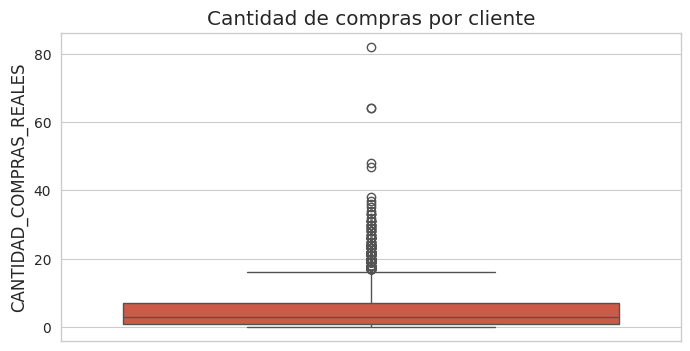

,CLIENTE,CANTIDAD_COMPRAS_REALES,SEGMENTO
2,0000021,20,NORMAL
26,0000311,26,NORMAL
31,0000375,19,CED
33,0000400,17,NORMAL
40,0000442,18,NORMAL
...,...,...,...
3157,0012657,20,NORMAL
3322,0012847,17,NORMAL
3335,0012860,17,NORMAL
3369,0012897,18,NORMAL


In [311]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_filtrado, y='CANTIDAD_COMPRAS_REALES')
plt.title("Cantidad de compras por cliente")
plt.show()

# Identificar clientes con comportamiento atípico
outliers = df_filtrado[df_filtrado['CANTIDAD_COMPRAS_REALES'] > df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.95)]
outliers[['CLIENTE','CANTIDAD_COMPRAS_REALES', 'SEGMENTO']]

Un pequeño grupo de clientes hace muchas compras (potenciales outliers). Se constata que son de tipo comercio algunos y otros funcionarios con segmento mal asignado y se proceden a eliminarlos del df.

In [312]:
# Lista de segmentos a excluir
clientes_excluir = [
    '0012115', '0011422', '0010041', '0012272',
    '0000851', 'F0074'
]

# Filtrar el dataframe excluyendo esos segmentos
df_filtrado = df_filtrado[~df_filtrado['CLIENTE'].isin(clientes_excluir)]

# Verificar resultados
print(df_filtrado['SEGMENTO'].value_counts())

SEGMENTO
NORMAL         3968
SIN ASIGNAR      38
DESCONOCIDO      38
CED              32
CLUBITAU         22
ESTUFAS          15
RESIDENCIAL       2
NVM               2
CLEARING          2
Name: count, dtype: int64


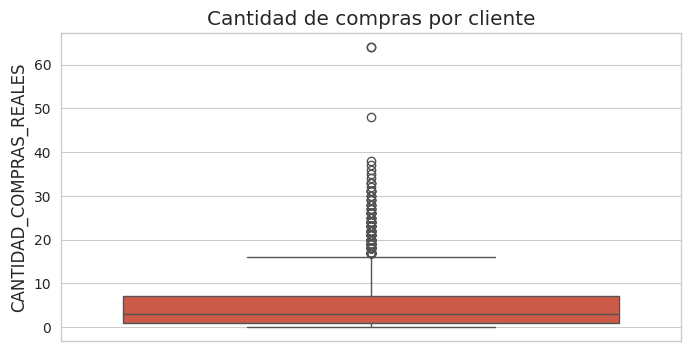

Outlier: 16.0


In [313]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_filtrado, y='CANTIDAD_COMPRAS_REALES')
plt.title("Cantidad de compras por cliente")
plt.show()

# Identificar clientes con comportamiento atípico
outliers = df_filtrado[df_filtrado['CANTIDAD_COMPRAS_REALES'] > df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.95)]
outliers[['CLIENTE','CANTIDAD_COMPRAS_REALES', 'SEGMENTO']]

print("Outlier:", df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.95))

### *5.2 Análisis bivariado*

In [314]:
df_filtrado

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,MONTO_DEVUELTO,SATISFACCION_TOTAL,SATISFACCION_NC,SATISFACCION_ENCUESTA,TIENE_RECLAMOS,RESPONDIO_ENCUESTA,SEGMENTO,ZONA_AGRUPADA,MONTO_DEUDA,ZONA_REAL_FRECUENTE
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0,...,0.0,4.0,4.0,0.0,1,0,SIN ASIGNAR,ZONA 10,NaN,ZONA 10
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0,...,0.0,0.0,0.0,3.0,0,1,NORMAL,ZONA 1,NaN,ZONA 1
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,F1205,2,2,2025-06-20,2025-07-10,2,20,3.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,SIN ASIGNAR,ZONA 3,NaN,ZONA 3
4276,F1206,2,2,2024-08-31,2025-06-30,2,303,0.198020,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 4,NaN,ZONA 4
4277,P00255,3,3,2021-04-23,2024-06-28,3,1162,0.077453,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 2,NaN,ZONA 6
4278,P01726,1,1,2023-12-08,2023-12-08,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1


#### *5.2.1 Distribución de clientes activos vs fugados*

Este gráfico explora la relación entre la actividad actual de los clientes (si están activos o no) y su condición de fuga (si dejaron de comprar o estan en riesgo de fuga). Esta comparación permite identificar qué proporción de los clientes activos ya se consideran fugados, lo cual es clave para la segmentación y estrategias de retención.

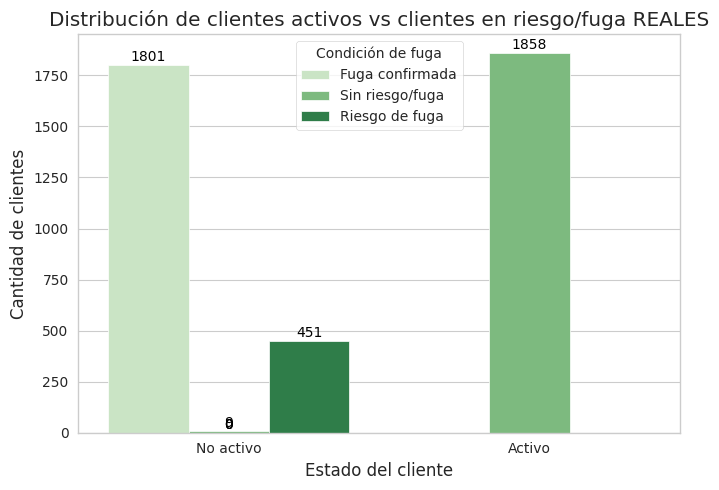

In [315]:
# Crear etiquetas para graficar sin modificar el DF original
df_plot = df_filtrado.copy()
df_plot['ACTIVO_LABEL'] = df_plot['ACTIVO_REAL'].map({1: 'Activo', 0: 'No activo'})

# Para la columna de fuga, podemos combinar Riesgo de fuga y Fuga confirmada
def fuga_label(row):
    if row['RIESGO_FUGA_REAL']:
        return 'Riesgo de fuga'
    elif row['FUGA_CONFIRMADA_REAL']:
        return 'Fuga confirmada'
    else:
        return 'Sin riesgo/fuga'

df_plot['FUGA_LABEL'] = df_plot.apply(fuga_label, axis=1)

# Countplot
plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df_plot,
    x='ACTIVO_LABEL',
    hue='FUGA_LABEL',
    palette='Greens'
)

plt.title('Distribución de clientes activos vs clientes en riesgo/fuga REALES')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Condición de fuga')

# Agregar etiquetas con el recuento encima de cada barra
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(
        x, height + 5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

In [316]:
# Revisar conteo de cada categoría
print(df_plot['ACTIVO_LABEL'].value_counts())
print(df_plot['FUGA_LABEL'].value_counts())

ACTIVO_LABEL
No activo    2261
Activo       1858
Name: count, dtype: int64
FUGA_LABEL
Sin riesgo/fuga    1867
Fuga confirmada    1801
Riesgo de fuga      451
Name: count, dtype: int64


Aproximadamente la mitad de los clientes sigue comprando regularmente (activo). La otra mitad está sin compras recientes, lo que indica un área de riesgo y pérdida potencial de clientes; o de clientes que nunca realizaron una compra.

El riesgo de fuga es un pequeño grupo de clientes “casi perdidos”, y sobre ellos es donde vale la pena enfocarse para maximizar retorno de inversión. La mayoría de los clientes inactivos ya se consideran perdidos.

Hay 9 clientes que puede que nunca hayan hecho compras, que debido a eso son inactivos y sin riesgo de fuga en el gráfico.

#### *5.2.2 Relación entre toneladas por compra y cantidad de compras por cliente*

En este gráfico se analiza la relación entre la frecuencia de compras (cantidad de compras realizadas por cliente) y el promedio de toneladas compradas por transacción. El objetivo es observar si hay algún patrón en cuanto al tipo de cliente: por ejemplo, si quienes compran más veces tienden a comprar en menor cantidad o viceversa. Se identifican también los valores atípicos (outliers) para entender mejor los extremos del comportamiento.

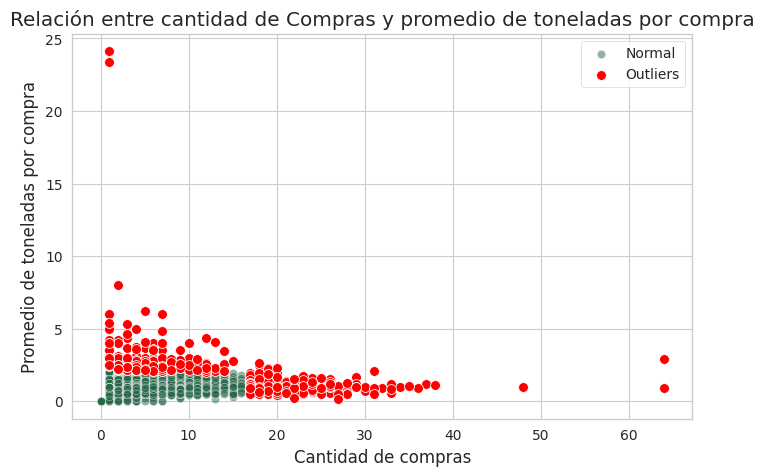

In [317]:
# Calcular los cuartiles y el IQR para cada variable
Q1_x = df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.25)
Q3_x = df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_filtrado['TONELADAS_POR_COMPRA'].quantile(0.25)
Q3_y = df_filtrado['TONELADAS_POR_COMPRA'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Definir límites para outliers
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Crear una máscara para los outliers en cualquiera de los dos ejes
outliers = ((df_filtrado['CANTIDAD_COMPRAS_REALES'] < lower_bound_x) |
            (df_filtrado['CANTIDAD_COMPRAS_REALES'] > upper_bound_x) |
            (df_filtrado['TONELADAS_POR_COMPRA'] < lower_bound_y) |
            (df_filtrado['TONELADAS_POR_COMPRA'] > upper_bound_y))

plt.figure(figsize=(8,5))
# Graficar todos los puntos normales
sns.scatterplot(data=df_filtrado[~outliers],
                x='CANTIDAD_COMPRAS_REALES', y='TONELADAS_POR_COMPRA',
                alpha=0.5, color='#276749', label='Normal')

# Graficar los outliers en otro color y tamaño
sns.scatterplot(data=df_filtrado[outliers],
                x='CANTIDAD_COMPRAS_REALES', y='TONELADAS_POR_COMPRA',
                color='red', s=50, label='Outliers')

plt.title('Relación entre cantidad de Compras y promedio de toneladas por compra')
plt.xlabel('Cantidad de compras')
plt.ylabel('Promedio de toneladas por compra')
plt.legend()
plt.show()

In [318]:
print(df_filtrado['CANTIDAD_COMPRAS_REALES'].quantile(0.95))
print(df_filtrado['TONELADAS_POR_COMPRA'].quantile(0.95))

16.0
2.134166666666666


In [319]:
df_sin_outliers = df_filtrado[~outliers]
df_outliers = df_filtrado[outliers]
df_sin_outliers

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,MONTO_DEVUELTO,SATISFACCION_TOTAL,SATISFACCION_NC,SATISFACCION_ENCUESTA,TIENE_RECLAMOS,RESPONDIO_ENCUESTA,SEGMENTO,ZONA_AGRUPADA,MONTO_DEUDA,ZONA_REAL_FRECUENTE
0,0000001,3,3,2023-05-02,2023-06-02,3,31,2.903226,0.0,0.0,...,0.0,4.0,4.0,0.0,1,0,SIN ASIGNAR,ZONA 10,NaN,ZONA 10
1,0000002,8,8,2020-06-17,2021-08-30,8,439,0.546697,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
3,0000031,2,2,2023-06-21,2023-08-29,2,69,0.869565,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
4,0000059,2,2,2020-07-02,2022-05-21,2,688,0.087209,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
5,0000061,15,15,2020-03-23,2025-08-26,15,1982,0.227043,0.0,0.0,...,-220.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,F1205,2,2,2025-06-20,2025-07-10,2,20,3.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,SIN ASIGNAR,ZONA 3,NaN,ZONA 3
4276,F1206,2,2,2024-08-31,2025-06-30,2,303,0.198020,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 4,NaN,ZONA 4
4277,P00255,3,3,2021-04-23,2024-06-28,3,1162,0.077453,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 2,NaN,ZONA 6
4278,P01726,1,1,2023-12-08,2023-12-08,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1


In [320]:
df_outliers

,CLIENTE,CANTIDAD_FACTURAS_TOTALES,CANTIDAD_COMPRAS_REALES,FECHA_PRIMERA,FECHA_ULTIMA,DIAS_CONSUMO,RANGO_DIAS,COMPRAS_POR_MES,DIFERENCIA,PORCENTAJE_DIF,...,MONTO_DEVUELTO,SATISFACCION_TOTAL,SATISFACCION_NC,SATISFACCION_ENCUESTA,TIENE_RECLAMOS,RESPONDIO_ENCUESTA,SEGMENTO,ZONA_AGRUPADA,MONTO_DEUDA,ZONA_REAL_FRECUENTE
2,0000021,20,20,2020-05-06,2024-09-06,20,1584,0.378788,0.0,0.0,...,0.0,0.0,0.0,3.0,0,1,NORMAL,ZONA 1,NaN,ZONA 1
15,0000173,4,4,2020-06-26,2024-09-04,4,1531,0.078380,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
26,0000311,26,26,2020-03-09,2025-08-13,22,1983,0.393343,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
31,0000375,19,19,2020-05-26,2025-07-31,19,1892,0.301268,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,CED,ZONA 1,NaN,ZONA 1
33,0000400,17,17,2020-04-20,2025-06-05,17,1872,0.272436,0.0,0.0,...,0.0,5.0,5.0,0.0,1,0,NORMAL,ZONA 2,NaN,ZONA 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,0013558,1,1,2025-03-28,2025-03-28,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 1
3960,0013600,1,1,2025-04-12,2025-04-12,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 7,NaN,ZONA 7
3968,0013612,5,1,2025-06-26,2025-07-31,5,35,0.857143,4.0,80.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 1,NaN,ZONA 4
4093,0013765,1,1,2025-06-18,2025-06-18,1,0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NORMAL,ZONA 3,NaN,ZONA 3


Se observa una concentración importante de clientes con pocas compras y un bajo volumen promedio por transacción.

La nube de puntos tiende a dispersarse más en compradores frecuentes, lo que sugiere que los patrones de compra son más variados en estos casos.

Los outliers se identifican claramente: algunos clientes hacen pocas compras pero de alto volumen (posiblemente grandes clientes o comercios), y otros compran con mucha frecuencia pero en pequeñas cantidades.

Luego de observar los datos de los outliers, se decide mantenerlos para ver como se comportan en el modelo, ya que contienen información valiosa de clientes activos, en riesgo y fugados.

#### *5.2.3 Relación entre toneladas compradas y zona*

Este gráfico muestra el total de toneladas compradas agrupadas según la zona más frecuente de los clientes vs la cantidad de clientes. El objetivo es identificar cuáles son las zonas que concentran la mayor cantidad de toneladas compradas y analizar su participación relativa dentro del total, comparado con la cantidad de clientes existentes por zona.

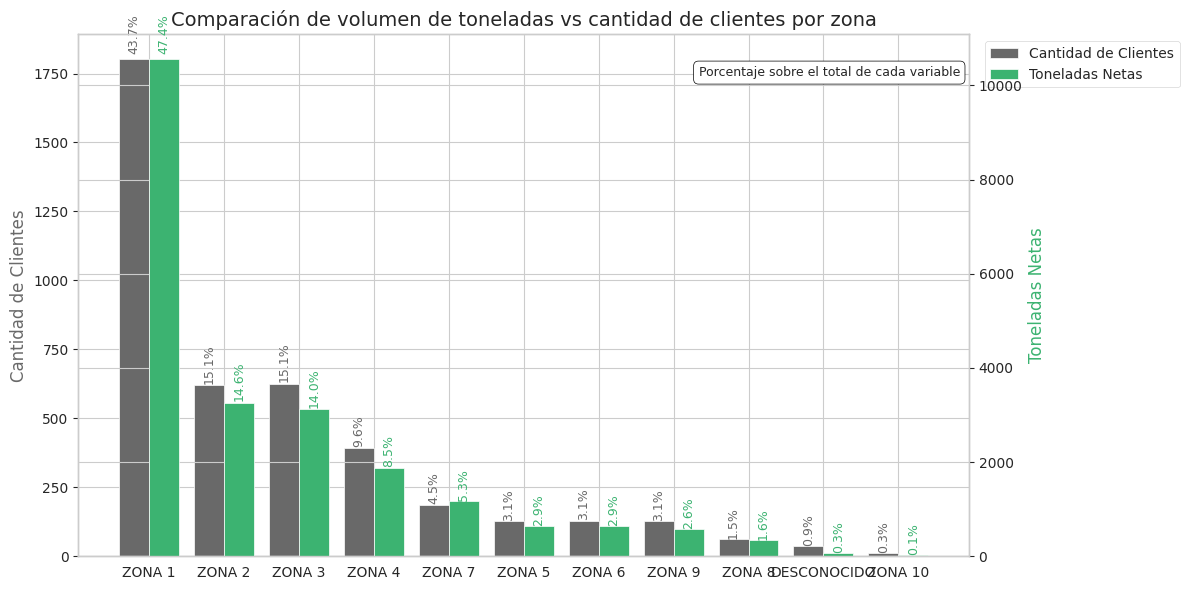

In [321]:
# Preparar datos
zona_volumen = df_filtrado.groupby('ZONA_AGRUPADA')['TONELADAS_NETAS'].sum().sort_values(ascending=False)
zona_clientes = df_filtrado['ZONA_AGRUPADA'].value_counts().reindex(zona_volumen.index)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

# Posiciones para las barras
x = np.arange(len(zona_volumen))
bar_width = 0.4

# Barras lado a lado
ax2.bar(x + bar_width/2, zona_volumen.values, width=bar_width, color='mediumseagreen', label='Toneladas Netas', align='center')
ax1.bar(x - bar_width/2, zona_clientes.values, width=bar_width, color='dimgrey', label='Cantidad de Clientes', align='center')

# Ejes y título
ax2.set_ylabel("Toneladas Netas", fontsize=12, color='mediumseagreen')
ax1.set_ylabel("Cantidad de Clientes", fontsize=12, color='dimgrey')
plt.title("Comparación de volumen de toneladas vs cantidad de clientes por zona", fontsize=14)
plt.xticks(x, zona_volumen.index, rotation=45, ha='right')

# Porcentajes sobre cada barra
for i, valor in enumerate(zona_volumen.values):
    porcentaje = f'{100 * valor / zona_volumen.sum():.1f}%'
    ax2.text(i + bar_width/2, valor + valor*0.01, porcentaje, ha='center', va='bottom', fontsize=9, color='mediumseagreen', rotation=90)

for i, valor in enumerate(zona_clientes.values):
    porcentaje = f'{100 * valor / zona_clientes.sum():.1f}%'
    ax1.text(i - bar_width/2, valor + valor*0.01, porcentaje, ha='center', va='bottom', fontsize=9, color='dimgrey', rotation=90)

# Leyenda fuera del gráfico
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2,
           loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)

# Cuadro de texto aclaratorio
plt.text(
    0.99, 0.92,
    'Porcentaje sobre el total de cada variable',
    transform=plt.gca().transAxes,
    fontsize=9,
    ha='right',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()

Las zonas 1, 3, 2, 4 y 7 lideran con un 90% en volumen total de toneladas compradas.
En particular, la ZONA 1 (De Malvin a Parque Miramar) representa un porcentaje significativo del total de toneladas vendidas, lo cual coincide con su liderazgo en la cantidad de clientes.

Un dato destacable es la ZONA 7 (Tres Cruces a La Teja) que prevalece en ambos gráficos, tanto de clientes como de toneladas, un dato revelador para la empresa.

#### *5.2.4 Clientes en riesgo de fuga por segmento*

Este gráfico permite visualizar cuáles segmentos de clientes han presentado mayor cantidad de fugas. Es útil para identificar grupos vulnerables y diseñar estrategias de fidelización más específicas.

/tmp/ipython-input-807606415.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='SEGMENTO', y='CANTIDAD', palette=paleta_segmentos_fugados)


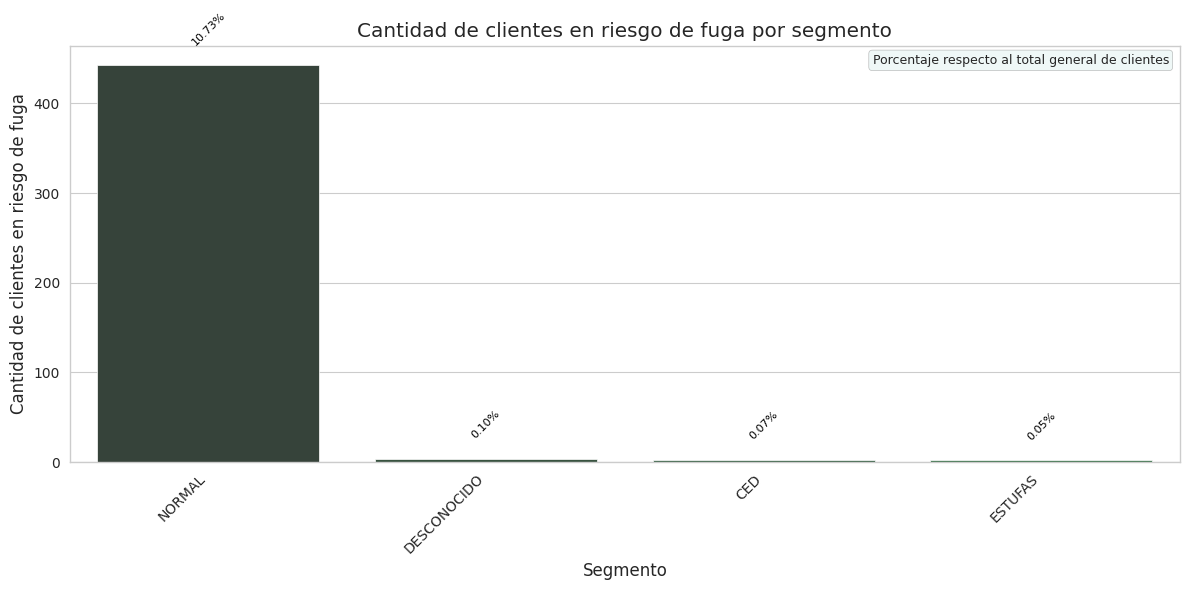

In [322]:
# Filtrar solo los clientes fugados y los segmentadores de interés
df_fugados = df_filtrado[
    (df_filtrado['RIESGO_FUGA_REAL'] == 1) &
    (df_filtrado['SEGMENTO'].notnull())  # o notna()
]

# Contar los clientes fugados por segmentador
fugados_segmentador_counts = df_fugados['SEGMENTO'].value_counts().sort_values(ascending=False)

# Usar solo los primeros 19 colores para evitar warnings
paleta_segmentos_fugados = paleta_invertida[:len(fugados_segmentador_counts)]

# Preparar DataFrame para barplot
df_plot = fugados_segmentador_counts.reset_index()
df_plot.columns = ['SEGMENTO', 'CANTIDAD']

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_plot, x='SEGMENTO', y='CANTIDAD', palette=paleta_segmentos_fugados)

plt.title('Cantidad de clientes en riesgo de fuga por segmento')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de clientes en riesgo de fuga')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra (respecto al total de clientes)
total_clientes = len(df_filtrado)
for i, valor in enumerate(df_plot['CANTIDAD']):
    porcentaje = f'{100 * valor / total_clientes:.2f}%'
    ax.text(i, valor + total_clientes * 0.005, porcentaje,
            ha='center', va='bottom', fontsize=8, rotation=45, color='black')

# Aclaración sobre el porcentaje
plt.text(0.99, 0.98, 'Porcentaje respecto al total general de clientes',
         transform=plt.gca().transAxes, fontsize=9, ha='right', va='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='#e0f2f1', edgecolor='gray', alpha=0.5))

plt.tight_layout()
plt.show()

Este resultado era esperable, ya que el segmento NORMAL es también uno de los segmentos más numerosos.

#### *5.2.5 Relación entre reclamos y clientes en riesgo de fuga*

El gráfico de barras apiladas muestra la relación entre los reclamos de clientes y el estado de riesgo de fuga.
Cada barra representa un grupo de clientes según si tienen reclamos o no, y los segmentos de la barra indican la proporción de clientes fugados o no fugados.
Esto permite visualizar cómo los reclamos impactan en la probabilidad de fuga y comparar fácilmente entre ambos grupos.

RIESGO_FUGA_REAL         0         1
TIENE_RECLAMOS                      
0                 0.894252  0.105748
1                 0.740000  0.260000


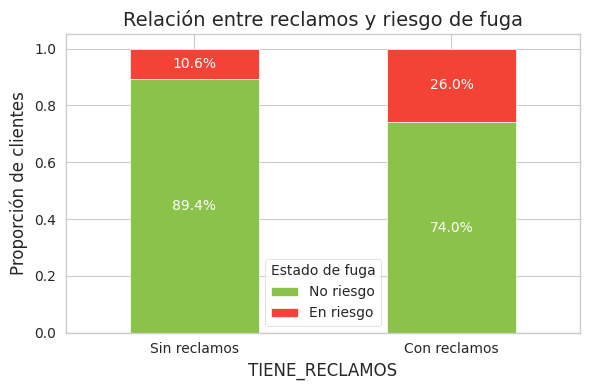

In [323]:
# Tabla de proporciones
ct_reclamos_fuga = pd.crosstab(df_filtrado['TIENE_RECLAMOS'], df_filtrado['RIESGO_FUGA_REAL'], normalize='index')
print(ct_reclamos_fuga)

# Colores consistentes
colores = ['#8bc34a', '#f44336']  # Verde = no fugado, rojo = fugado
etiquetas = ['No riesgo', 'En riesgo']

# Gráfico apilado
ax = ct_reclamos_fuga.plot(
    kind='bar', stacked=True, color=colores, figsize=(6,4)
)

plt.title("Relación entre reclamos y riesgo de fuga", fontsize=14)
plt.ylabel("Proporción de clientes")
plt.xticks(ticks=[0,1], labels=['Sin reclamos', 'Con reclamos'], rotation=0)

# Agregar etiquetas de porcentaje sobre las barras
for i, row in enumerate(ct_reclamos_fuga.values):
    bottom = 0
    for j, val in enumerate(row):
        ax.text(i, bottom + val/2, f'{val*100:.1f}%', ha='center', va='center', color='white', fontsize=10)
        bottom += val

plt.legend(title="Estado de fuga", labels=etiquetas)
plt.tight_layout()
plt.show()

La mayor parte de los clientes se mantiene en sin riesgo de fuga, indicando que no presentar reclamos se asocia a menor riesgo de fuga. Una proporción pequeña, pero significativa, se encuentra en riesgo de fuga, lo que puede reflejar otras causas de insatisfacción o abandono.

Los reclamos actúan como un indicador de alerta temprana para detectar clientes con mayor riesgo de fuga.

#### *5.2.6 Consumo de toneladas por compra según segmento de clientes en riesgo de fuga*

Este gráfico analiza cómo varía el promedio de toneladas compradas por compra según el segmentador comercial de los clientes que se fugaron. El objetivo es detectar si existen patrones de consumo distintos entre los segmentos comerciales, lo cual podría orientar estrategias de fidelización específicas.

/tmp/ipython-input-1117017158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL']==1],


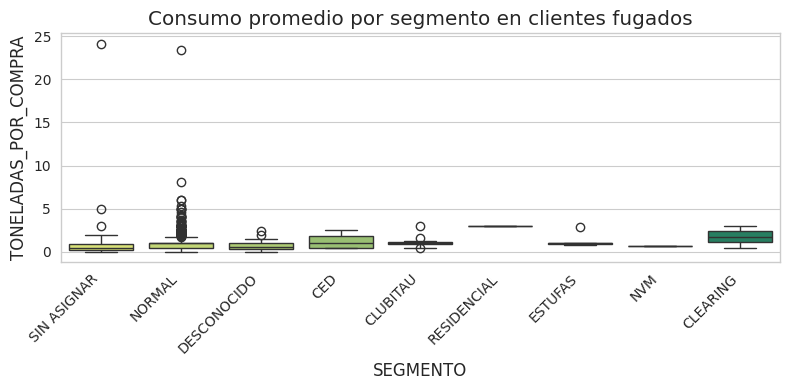

In [324]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL']==1],
            x='SEGMENTO', y='TONELADAS_POR_COMPRA', palette="summer_r")
plt.title("Consumo promedio por segmento en clientes fugados")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En general, la mayoría de los segmentos presentan una mediana de entre 0 y 2 toneladas por compra, lo que indica un patrón de consumo moderado o bajo. Asimismo, se pueden visualizar muchos outliers que influyen en el gráfico.

El segmento CLEARING demuestra un rango más amplio, un dato relevante a tener en cuenta de aquellos clientes que por morosos no les vendimos más.

Esta información es relevante desde el punto de vista comercial, ya que la fuga de clientes en estos segmentos representa una pérdida considerable de volumen de ventas.

#### *5.2.7 Relación entre deuda y encuesta según clientes en riesgo de fuga*

Este gráfico compara el monto de deuda entre clientes en riesgo de fuga o no, considerando además si respondieron o no la encuesta de satisfacción. El objetivo es evaluar si existen diferencias significativas de deuda entre estos grupos, lo cual puede aportar a la interpretación del comportamiento del cliente.

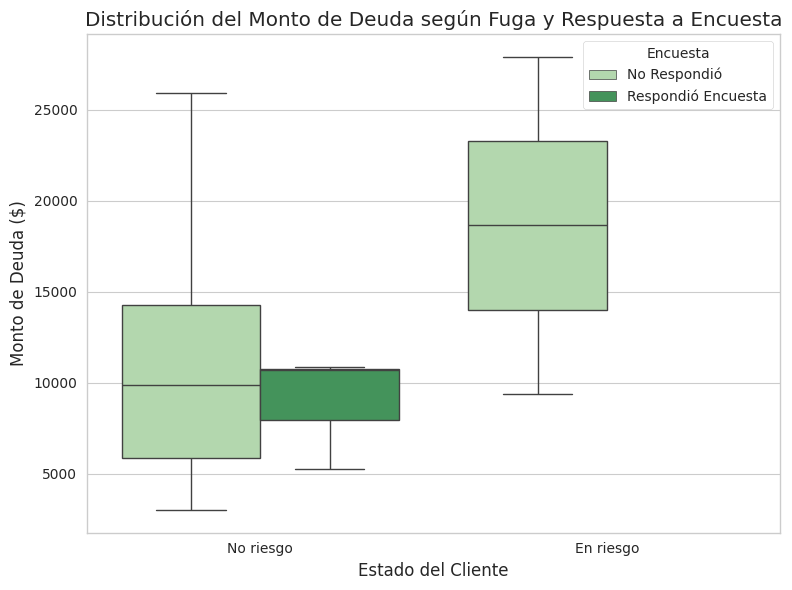

In [325]:
df_plot = df_filtrado.copy()

# Reemplazar valores booleanos por etiquetas legibles
df_plot['RIESGO_FUGA_REAL'] = df_plot['RIESGO_FUGA_REAL'].map({1: 'En riesgo', 0: 'No riesgo'})
df_plot['RESPONDIO_ENCUESTA'] = df_plot['RESPONDIO_ENCUESTA'].map({1: 'Respondió Encuesta', 0: 'No Respondió'})

plt.figure(figsize=(8,6))
sns.boxplot(data=df_plot, x='RIESGO_FUGA_REAL', y='MONTO_DEUDA', hue='RESPONDIO_ENCUESTA', palette='Greens')
plt.title('Distribución del Monto de Deuda según Fuga y Respuesta a Encuesta')
plt.xlabel('Estado del Cliente')
plt.ylabel('Monto de Deuda ($)')
plt.legend(title='Encuesta')
plt.tight_layout()
plt.show()

Los clientes en riesgo que no respondieron la encuesta muestran una mayor dispersión en el monto de deuda, con valores más extremos.

Aquellos que respondieron la encuesta, tanto en riesgo como activos, tienden a tener una deuda más baja y estable.

Se sugiere que la participación en la encuesta podría estar asociada a un mayor compromiso del cliente y, posiblemente, a una mejor relación comercial.

La combinación de riesgo de fuga + deuda alta + no respuesta podría indicar un perfil de riesgo: clientes con baja interacción, insatisfacción no reportada y situación financiera comprometida.

#### *5.2.8 Relación entre cantidad de compras y monto promedio de compra de clientes finales fugados*

Este gráfico de dispersión compara la frecuencia de compras con el monto promedio por compra, segmentando a los clientes de tipo NORMAL según su condición de fugado o activo. El objetivo es identificar si existe un patrón en el comportamiento de fuga dentro de este grupo, que representa a los clientes finales más comunes de la empresa.

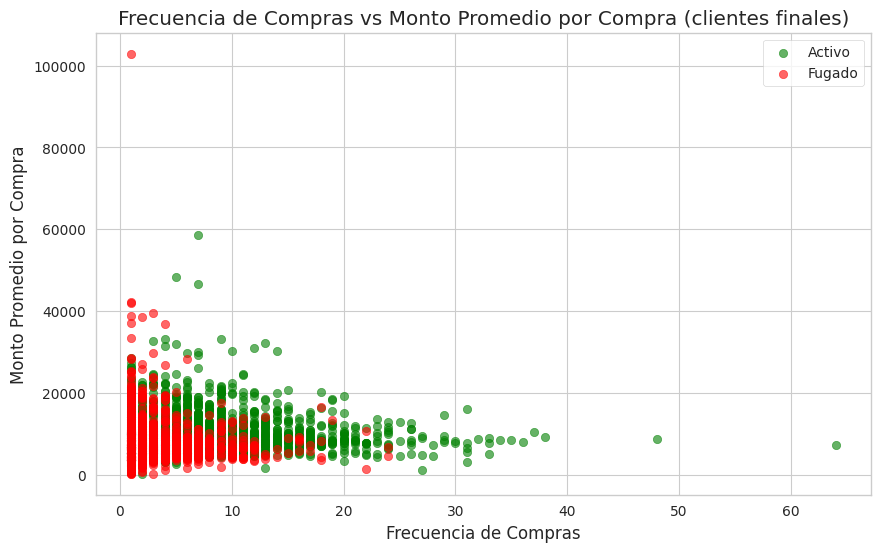

In [326]:
df_filtrado['MONTO_PROMEDIO_POR_COMPRA'] = df_filtrado['MONTO_FACTURADO'] / df_filtrado['CANTIDAD_COMPRAS_REALES']

# Filtro base para clientes activos y segmento específico
filtro_activos = (df_filtrado['ACTIVO_REAL'] == 1) & (df_filtrado['SEGMENTO'] == 'NORMAL')
filtro_fugados = (df_filtrado['FUGA_CONFIRMADA_REAL'] == True) & (df_filtrado['SEGMENTO'] == 'NORMAL')

plt.figure(figsize=(10,6))

plt.scatter(
    df_filtrado.loc[filtro_activos, 'CANTIDAD_COMPRAS_REALES'],
    df_filtrado.loc[filtro_activos, 'MONTO_PROMEDIO_POR_COMPRA'],
    color='green', label='Activo', alpha=0.6
)

plt.scatter(
    df_filtrado.loc[filtro_fugados, 'CANTIDAD_COMPRAS_REALES'],
    df_filtrado.loc[filtro_fugados, 'MONTO_PROMEDIO_POR_COMPRA'],
    color='red', label='Fugado', alpha=0.6
)

plt.title('Frecuencia de Compras vs Monto Promedio por Compra (clientes finales)')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Monto Promedio por Compra')

plt.legend()
plt.grid(True)
plt.show()

Los clientes fugados tienden a concentrarse en la parte inferior izquierda del gráfico, es decir, tienen pocas compras y un monto promedio bajo, lo que refuerza la hipótesis de que estos perfiles son más propensos a abandonar la empresa.

Los clientes activos presentan una mayor dispersión, con algunos casos de alta frecuencia de compra y/o montos promedio más elevados, lo que indica una relación comercial más fuerte y estable.

La combinación de frecuencia baja + monto bajo es un patrón característico de fuga en este tipo de cliente, lo cual puede utilizarse como señal de alerta en un sistema preventivo.

#### *5.2.9 Patrones estacionales*

FUGADOS

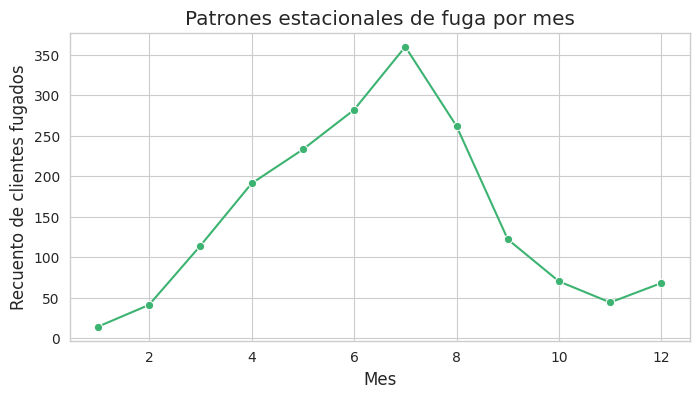

In [327]:
# Promedio mensual de fuga
df_filtrado['MES_ULTIMA_COMPRA'] = df_filtrado['FECHA_ULTIMA'].dt.month
fuga_mensual = df_filtrado.groupby('MES_ULTIMA_COMPRA')['FUGA_CONFIRMADA_REAL'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=fuga_mensual.index, y=fuga_mensual.values, marker='o', color='mediumseagreen')
plt.title("Patrones estacionales de fuga por mes")
plt.xlabel("Mes")
plt.ylabel("Recuento de clientes fugados")
plt.show()

El gráfico de líneas muestra el recuento de clientes fugados agrupado por el mes de la última compra. El pico en el mes 7 (julio) puede interpretarse como una concentración estacional de la fuga. Puede deberse a factores externos (clima invernal, mayor consumo en meses fríos, luego baja de demanda). Esta información sugiere que la fuga no es uniforme durante el año, sino que presenta un comportamiento estacional marcado.

EN RIESGO

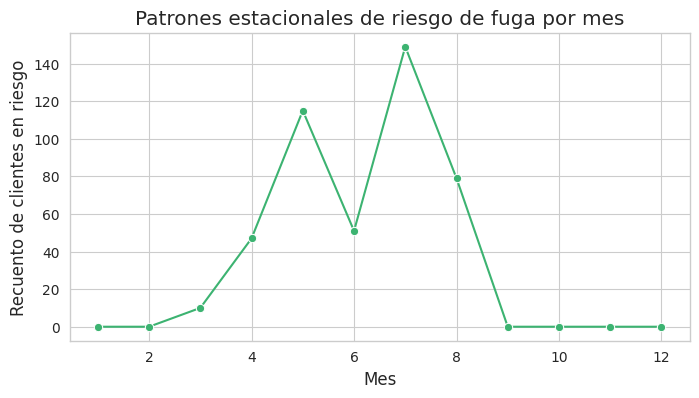

In [328]:
# Promedio mensual de clientes en riesgo de fuga
df_filtrado['MES_ULTIMA_COMPRA'] = df_filtrado['FECHA_ULTIMA'].dt.month
riesgo_fuga_mensual = df_filtrado.groupby('MES_ULTIMA_COMPRA')['RIESGO_FUGA_REAL'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=riesgo_fuga_mensual.index, y=riesgo_fuga_mensual.values, marker='o', color='mediumseagreen')
plt.title("Patrones estacionales de riesgo de fuga por mes")
plt.xlabel("Mes")
plt.ylabel("Recuento de clientes en riesgo")
plt.show()

En este caso se repite el patrón del mes 7 en el que los clientes son probables a fugarse. Asimismo, hay otro pico en el mes de mayo, indicando una posible tendencia a la fuga al comenzar el invierno.

#### *5.2.10 Patrones climáticos*

LLUVIA - FUGA CONFIRMADA

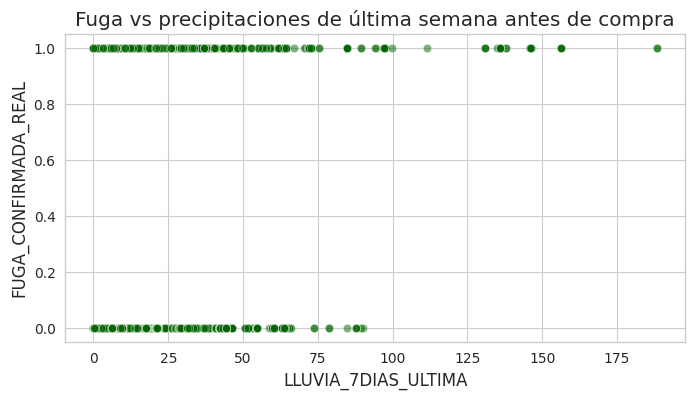

In [329]:
# Relación con lluvia promedio
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_filtrado, x='LLUVIA_7DIAS_ULTIMA', y='FUGA_CONFIRMADA_REAL', alpha=0.5, color='darkgreen')
plt.title("Fuga vs precipitaciones de última semana antes de compra")
plt.show()

En el gráfico se observa la dispersión de valores de lluvia en los clientes que sí fugaron (y=1) vs los que no fugaron (y=0). Si bien ambos se concentran en un promedio estándar de lluvia, en los clientes que sí se fugaron se observa un aumento los valores.

Estadísticos descriptivos por grupo:
                      min  25%  50%   75%    max   IQR
FUGA_CONFIRMADA_REAL                                  
0                     0.0  1.6  6.2  20.5   90.2  18.9
1                     0.0  0.6  7.2  27.8  188.4  27.2


/tmp/ipython-input-2153281805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


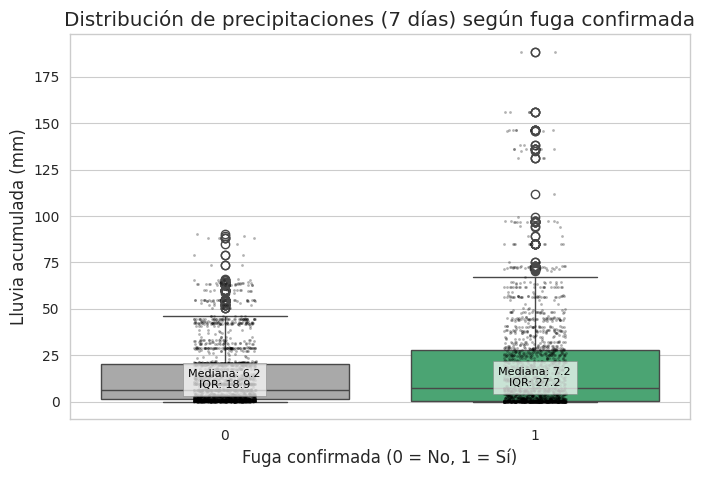

In [330]:
# 1. Estadísticos descriptivos por grupo
stats_fuga = df_filtrado.groupby('FUGA_CONFIRMADA_REAL')['LLUVIA_7DIAS_ULTIMA'].describe()
stats_fuga['IQR'] = stats_fuga['75%'] - stats_fuga['25%']
print("Estadísticos descriptivos por grupo:")
print(stats_fuga[['min', '25%', '50%', '75%', 'max', 'IQR']])

# 2. Gráfico combinado
plt.figure(figsize=(8,5))
sns.boxplot(
    x='FUGA_CONFIRMADA_REAL',
    y='LLUVIA_7DIAS_ULTIMA',
    data=df_filtrado,
    palette=['darkgrey', 'mediumseagreen'],
    showfliers=True
)
sns.stripplot(
    x='FUGA_CONFIRMADA_REAL',
    y='LLUVIA_7DIAS_ULTIMA',
    data=df_filtrado,
    color='black',
    alpha=0.3,
    size=2,
    jitter=True
)

# 3. Anotaciones de mediana e IQR
for i, grupo in enumerate(stats_fuga.index):
    mediana = stats_fuga.loc[grupo, '50%']
    iqr = stats_fuga.loc[grupo, 'IQR']
    plt.text(
        i, mediana, f"Mediana: {mediana:.1f}\nIQR: {iqr:.1f}",
        ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='grey')
    )

plt.title("Distribución de precipitaciones (7 días) según fuga confirmada")
plt.xlabel("Fuga confirmada (0 = No, 1 = Sí)")
plt.ylabel("Lluvia acumulada (mm)")
plt.show()

Esto muestra que la mayoría de clientes sin fuga se concentran en contextos de lluvias relativamente bajas a moderadas, mientras que los clientes con fuga tienen un rango más amplio, estando más expuestos a condiciones de lluvia extremas, lo que puede influir en la logística o en la satisfacción.

Los puntos superpuestos muestran que hay muchos valores fuera del rango típico (outliers), especialmente en clientes fugados, reforzando la idea de exposiciones extremas.

In [331]:
from scipy.stats import mannwhitneyu

# Separar los grupos
lluvia_no_fuga = df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL'] == 0]['LLUVIA_7DIAS_ULTIMA']
lluvia_fuga = df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL'] == 1]['LLUVIA_7DIAS_ULTIMA']

# Test de Mann-Whitney U
stat, p = mannwhitneyu(lluvia_no_fuga, lluvia_fuga, alternative='two-sided')

print("Estadístico U:", stat)
print("p-valor:", p)

Estadístico U: 2009249.5
p-valor: 0.03901811712684451


El p-valor < 0.05 indica que existe diferencia estadísticamente significativa entre la distribución de lluvias de los clientes fugados y no fugados. Esto sugiere que los clientes fugados tienden a experimentar mayores lluvias que los clientes no fugados, confirmando lo observado en la visualización y los descriptivos.

La lluvia parece tener un rol, con clientes fugados mostrando mayor dispersión y exposición a eventos extremos. El efecto no necesariamente es enorme, pero sí suficiente para ser relevante y puede integrarse como un factor en análisis de riesgo de fuga o modelado predictivo.

TEMPERATURA - FUGA CONFIRMADA

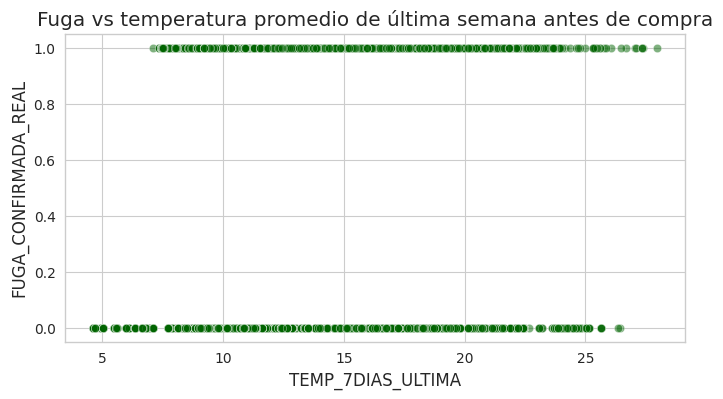

In [332]:
# Relación con temperatura promedio
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_filtrado, x='TEMP_7DIAS_ULTIMA', y='FUGA_CONFIRMADA_REAL', alpha=0.5, color='darkgreen')
plt.title("Fuga vs temperatura promedio de última semana antes de compra")
plt.show()

Estadísticos descriptivos por grupo:
                           min        25%        50%        75%        max  \
FUGA_CONFIRMADA_REAL                                                         
0                     4.639076   9.330952  10.832738  15.141667  26.450000   
1                     7.099405  10.243452  12.761310  16.512175  27.964881   

                           IQR  
FUGA_CONFIRMADA_REAL            
0                     5.810714  
1                     6.268722  


/tmp/ipython-input-48343610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


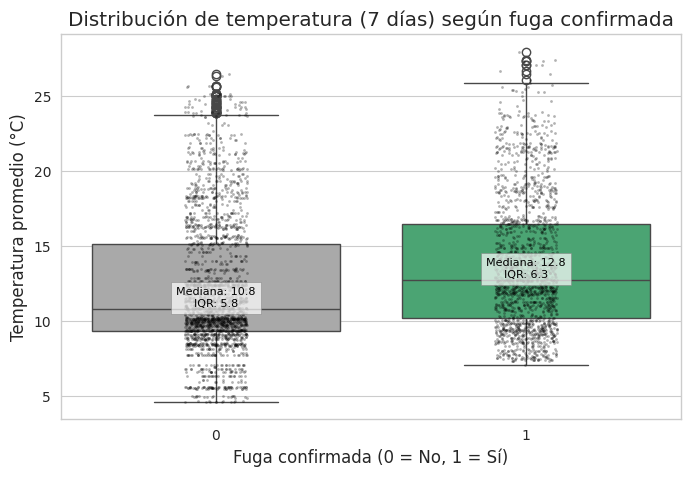

In [333]:
# 1. Estadísticos descriptivos por grupo
stats_fuga = df_filtrado.groupby('FUGA_CONFIRMADA_REAL')['TEMP_7DIAS_ULTIMA'].describe()
stats_fuga['IQR'] = stats_fuga['75%'] - stats_fuga['25%']
print("Estadísticos descriptivos por grupo:")
print(stats_fuga[['min', '25%', '50%', '75%', 'max', 'IQR']])

# 2. Gráfico combinado
plt.figure(figsize=(8,5))
sns.boxplot(
    x='FUGA_CONFIRMADA_REAL',
    y='TEMP_7DIAS_ULTIMA',
    data=df_filtrado,
    palette=['darkgrey', 'mediumseagreen'],
    showfliers=True
)
sns.stripplot(
    x='FUGA_CONFIRMADA_REAL',
    y='TEMP_7DIAS_ULTIMA',
    data=df_filtrado,
    color='black',
    alpha=0.3,
    size=2,
    jitter=True
)

# 3. Anotaciones de mediana e IQR
for i, grupo in enumerate(stats_fuga.index):
    mediana = stats_fuga.loc[grupo, '50%']
    iqr = stats_fuga.loc[grupo, 'IQR']
    plt.text(
        i, mediana, f"Mediana: {mediana:.1f}\nIQR: {iqr:.1f}",
        ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='grey')
    )

plt.title("Distribución de temperatura (7 días) según fuga confirmada")
plt.xlabel("Fuga confirmada (0 = No, 1 = Sí)")
plt.ylabel("Temperatura promedio (°C)")
plt.show()

In [334]:
# Separar los grupos
lluvia_no_fuga = df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL'] == 0]['TEMP_7DIAS_ULTIMA']
lluvia_fuga = df_filtrado[df_filtrado['FUGA_CONFIRMADA_REAL'] == 1]['TEMP_7DIAS_ULTIMA']

# Test de Mann-Whitney U
stat, p = mannwhitneyu(lluvia_no_fuga, lluvia_fuga, alternative='two-sided')

print("Estadístico U:", stat)
print("p-valor:", p)

Estadístico U: 1627709.5
p-valor: 6.399132297969234e-34


Los clientes que fugaron están más asociados a condiciones de temperatura más elevadas que los que no fugan, lo que podría afectar la logística de entrega, la experiencia de compra o la percepción de servicio.

El p-valor extremadamente bajo indica que la diferencia entre los grupos es altamente significativa estadísticamente. Esto confirma que la temperatura promedio que enfrentan los clientes fugados es sustancialmente mayor que la de los clientes no fugados.

Los clientes considerados fugados son los que no compran hace más de 18 meses, lo que significa que su última compra puede haber ocurrido fuera de la última zafra, es decir, incluso en primavera o verano. Por lo tanto, cuando observamos que los fugados tienen temperaturas mayores que los no fugados, podría estar reflejando que su última compra ocurrió en meses fuera de la zafra, más cálidos, en lugar de un efecto continuo durante la zafra.

Lluvia y temperatura son útiles para entender la experiencia de compra y condiciones de logística. Pero para el análisis de riesgo/fuga, la variable de tiempo desde la última compra (18 meses) sigue siendo el criterio principal. Los patrones de temperatura y lluvia ayudan a complementar la interpretación, no a definir causa directa de fuga.

TEMPERATURA Y LLUVIA - ZAFRA (MARZO A SEPTIEMBRE)

/tmp/ipython-input-4273240280.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


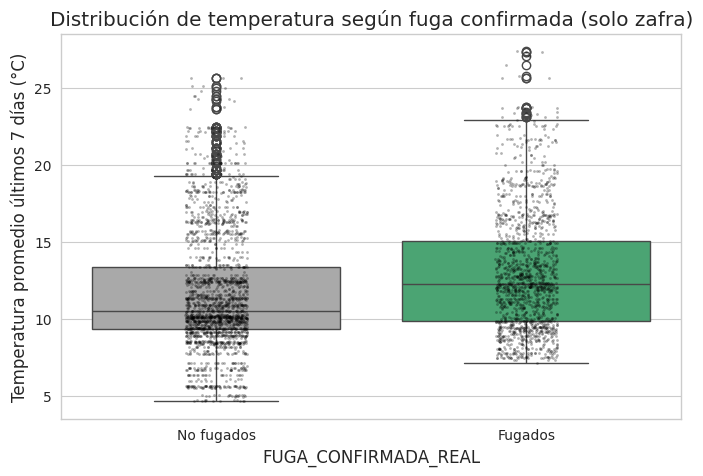

/tmp/ipython-input-4273240280.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


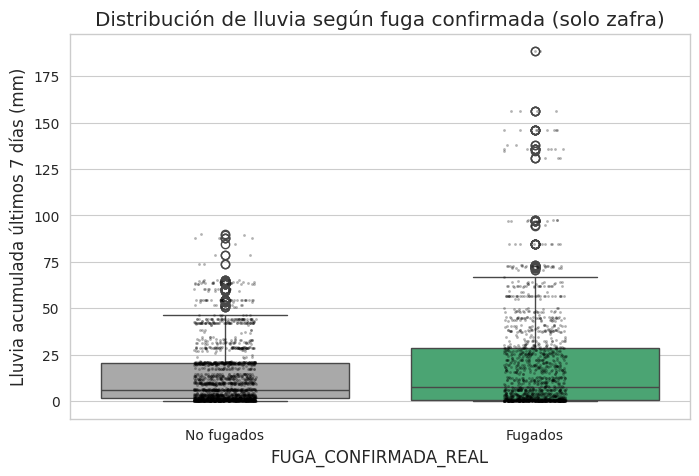

In [335]:
# Filtrar meses de zafra: marzo (3) a septiembre (9)
df_zafra = df_filtrado[df_filtrado['ZAFRA']== 1]

# Separar grupos
fugados = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 1]
no_fugados = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 0]

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Boxplot de temperatura por grupo de fuga durante zafra
plt.figure(figsize=(8,5))
sns.boxplot(
    x='FUGA_CONFIRMADA_REAL',
    y='TEMP_7DIAS_ULTIMA',
    data=df_zafra,
    palette=['darkgrey','mediumseagreen'],
    showfliers=True
)
sns.stripplot(
    x='FUGA_CONFIRMADA_REAL',
    y='TEMP_7DIAS_ULTIMA',
    data=df_zafra,
    color='black',
    alpha=0.3,
    size=2,
    jitter=True
)
plt.xticks([0,1], ['No fugados', 'Fugados'])
plt.ylabel('Temperatura promedio últimos 7 días (°C)')
plt.title('Distribución de temperatura según fuga confirmada (solo zafra)')
plt.show()

# 2️⃣ Boxplot de lluvia por grupo de fuga durante zafra
plt.figure(figsize=(8,5))
sns.boxplot(
    x='FUGA_CONFIRMADA_REAL',
    y='LLUVIA_7DIAS_ULTIMA',
    data=df_zafra,
    palette=['darkgrey','mediumseagreen'],
    showfliers=True
)
sns.stripplot(
    x='FUGA_CONFIRMADA_REAL',
    y='LLUVIA_7DIAS_ULTIMA',
    data=df_zafra,
    color='black',
    alpha=0.3,
    size=2,
    jitter=True
)
plt.xticks([0,1], ['No fugados', 'Fugados'])
plt.ylabel('Lluvia acumulada últimos 7 días (mm)')
plt.title('Distribución de lluvia según fuga confirmada (solo zafra)')
plt.show()


In [336]:
# --- Temperatura ---
temp_fuga = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 1]['TEMP_7DIAS_ULTIMA']
temp_no_fuga = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 0]['TEMP_7DIAS_ULTIMA']

# Estadísticos descriptivos
stats_temp = df_zafra.groupby('FUGA_CONFIRMADA_REAL')['TEMP_7DIAS_ULTIMA'].describe()
stats_temp['IQR'] = stats_temp['75%'] - stats_temp['25%']
print("Temperatura - estadísticos descriptivos por grupo (zafra):")
print(stats_temp[['min','25%','50%','75%','max','IQR']])

# Test Mann-Whitney
stat_temp, p_temp = mannwhitneyu(temp_no_fuga, temp_fuga, alternative='two-sided')
print(f"\nTemperatura - Mann-Whitney U: {stat_temp}, p-valor: {p_temp}")


# --- Lluvia ---
lluvia_fuga = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 1]['LLUVIA_7DIAS_ULTIMA']
lluvia_no_fuga = df_zafra[df_zafra['FUGA_CONFIRMADA_REAL'] == 0]['LLUVIA_7DIAS_ULTIMA']

# Estadísticos descriptivos
stats_lluvia = df_zafra.groupby('FUGA_CONFIRMADA_REAL')['LLUVIA_7DIAS_ULTIMA'].describe()
stats_lluvia['IQR'] = stats_lluvia['75%'] - stats_lluvia['25%']
print("\nLluvia - estadísticos descriptivos por grupo (zafra):")
print(stats_lluvia[['min','25%','50%','75%','max','IQR']])

# Test Mann-Whitney
stat_lluvia, p_lluvia = mannwhitneyu(lluvia_no_fuga, lluvia_fuga, alternative='two-sided')
print(f"\nLluvia - Mann-Whitney U: {stat_lluvia}, p-valor: {p_lluvia}")


Temperatura - estadísticos descriptivos por grupo (zafra):
                           min       25%        50%        75%        max  \
FUGA_CONFIRMADA_REAL                                                        
0                     4.639076  9.322024  10.501786  13.341511  25.663690   
1                     7.099405  9.825595  12.230655  15.074405  27.389881   

                           IQR  
FUGA_CONFIRMADA_REAL            
0                     4.019488  
1                     5.248810  

Temperatura - Mann-Whitney U: 1334417.0, p-valor: 3.2800892805331908e-28

Lluvia - estadísticos descriptivos por grupo (zafra):
                      min  25%  50%   75%    max   IQR
FUGA_CONFIRMADA_REAL                                  
0                     0.0  1.6  6.2  20.7   90.2  19.1
1                     0.0  0.8  7.6  28.6  188.4  27.8

Lluvia - Mann-Whitney U: 1600496.0, p-valor: 0.004998001753659285


La temperatura sigue siendo el factor más determinante en la asociación con fuga de clientes dentro de la zafra más restringida. La lluvia extrema sigue presente como variable relevante, principalmente en valores altos dispersos.

El patrón sugiere que incluso acotando la zafra, las condiciones climáticas (especialmente la temperatura) influyen en la probabilidad de fuga.

### *5.3 Análisis multivariado*

#### *5.3.1 Correlaciones de variables numéricas*

Este gráfico permite visualizar las correlaciones lineales entre variables cuantitativas del dataset. Es útil para identificar variables redundantes, relaciones fuertes o inversas, y para anticipar posibles problemas de multicolinealidad o efectos combinados en el modelado.

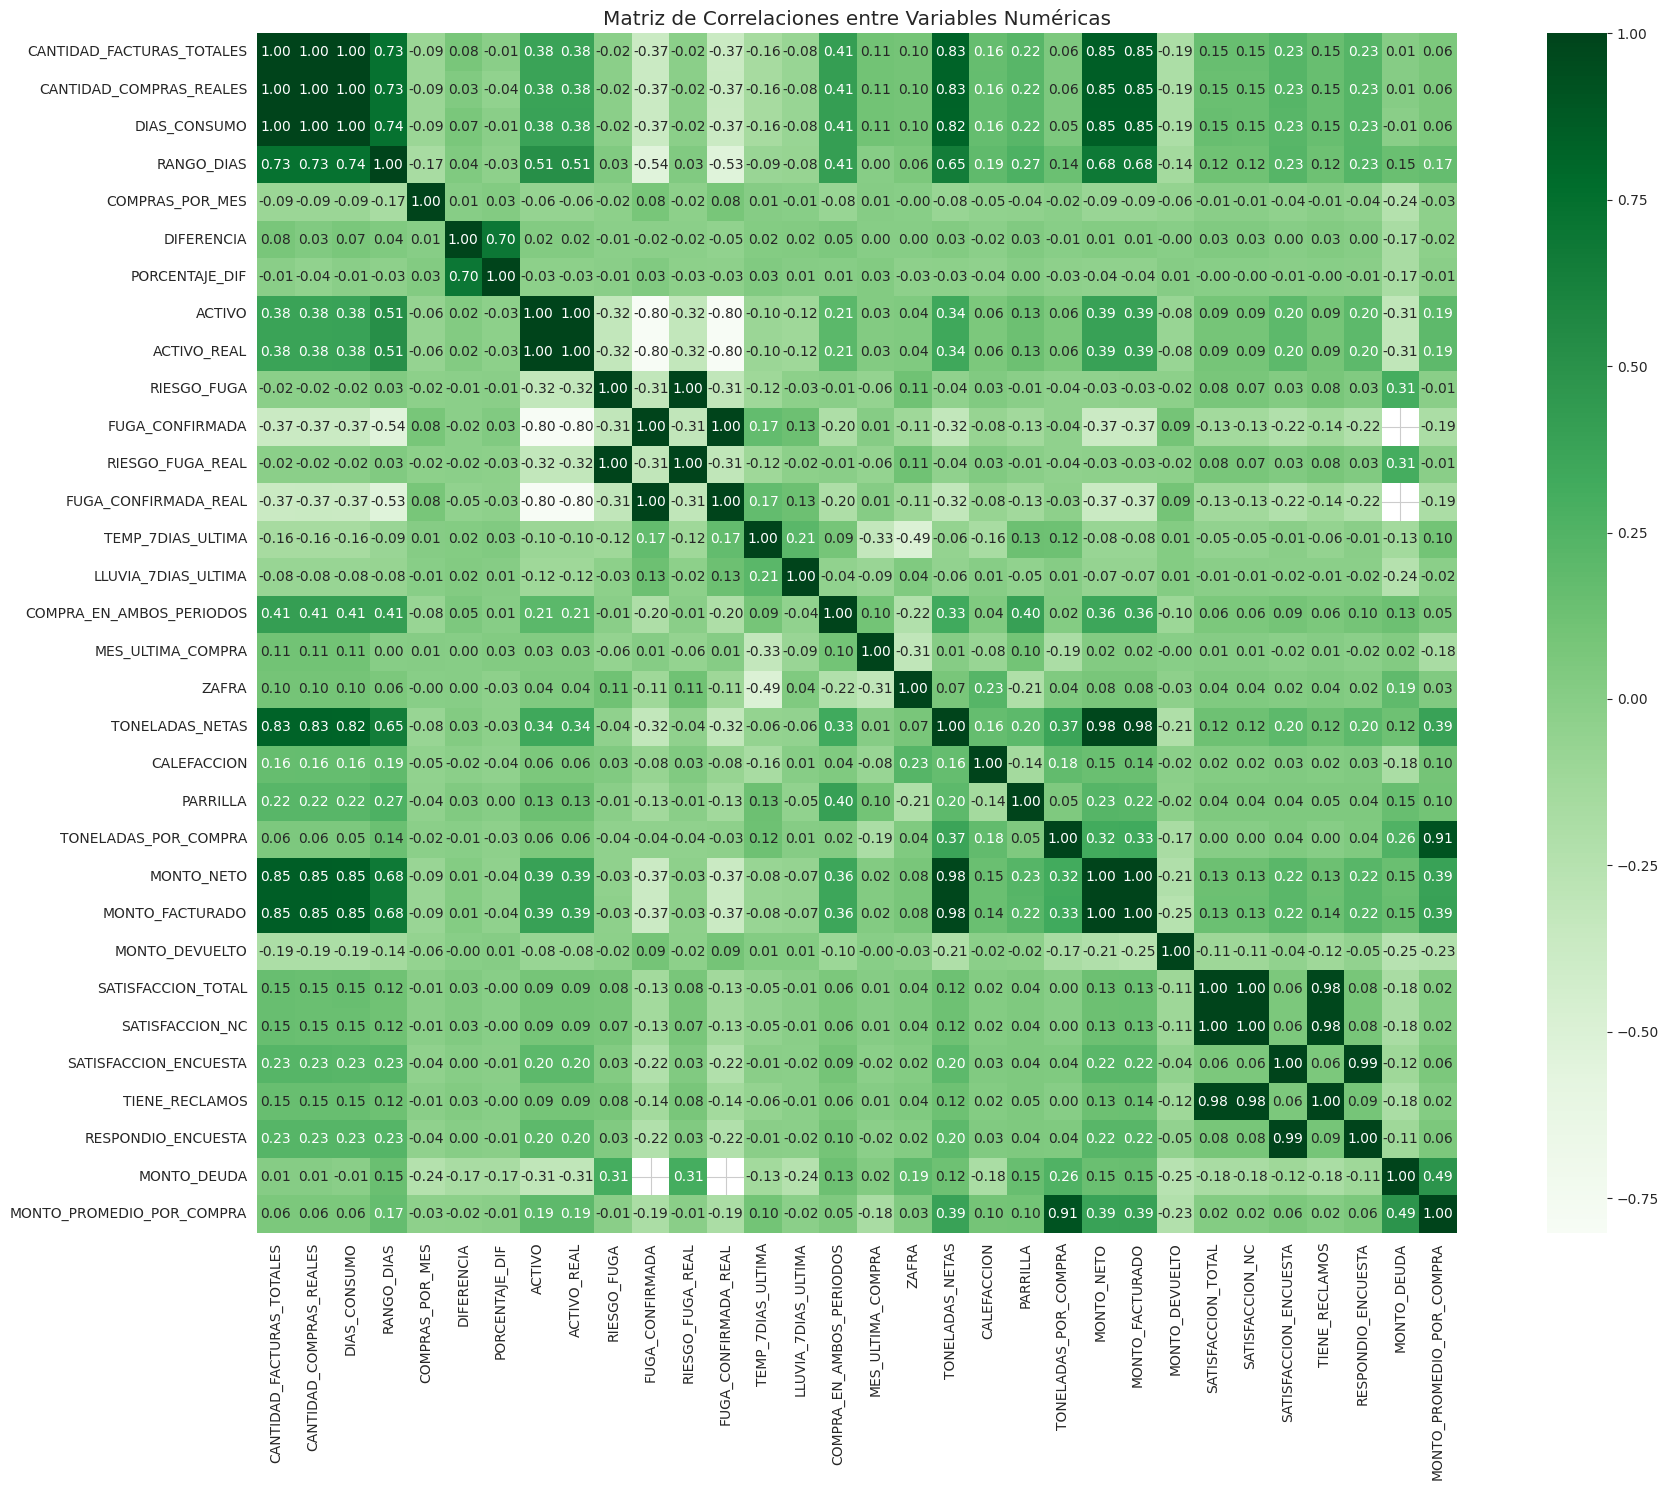

In [337]:
# Solo las columnas numericas
numericas = df_filtrado.select_dtypes(include=np.number)

plt.figure(figsize=(20,15))
sns.heatmap(numericas.corr(), annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title('Matriz de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

- **Altas correlaciones (mayores a 0.80)**

MONTO_NETO con MONTO_FACTURADO, CANTIDAD_COMPRAS_REALES, CANTIDAD_FACTURAS_TOTALES, DIAS_CONSUMO y TONELADAS_NETAS.

## **🧠 6- Entrenamiento y testeo de modelos**

###*6.1 Librerías*

In [338]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

###*6.2 Selección de features y target*

In [348]:
# 1. Seleccionar target
y = df_filtrado['RIESGO_FUGA_REAL']

# 2. Seleccionar features (quitar CLIENTE, fechas, target y variables derivadas del target)
features = [
    'CANTIDAD_COMPRAS_REALES', 'DIAS_CONSUMO', 'RANGO_DIAS',
    'COMPRAS_POR_MES', 'DIFERENCIA', 'PORCENTAJE_DIF',
    'TEMP_7DIAS_ULTIMA', 'LLUVIA_7DIAS_ULTIMA', 'MES_ULTIMA_COMPRA',
    'TONELADAS_NETAS', 'TONELADAS_POR_COMPRA',
    'MONTO_NETO', 'MONTO_FACTURADO', 'MONTO_DEVUELTO',
    'SATISFACCION_TOTAL', 'SATISFACCION_NC', 'SATISFACCION_ENCUESTA',
    'TIENE_RECLAMOS', 'RESPONDIO_ENCUESTA', 'MONTO_DEUDA',
    'MONTO_PROMEDIO_POR_COMPRA', 'COMPRA_EN_AMBOS_PERIODOS',
    'ZAFRA', 'CALEFACCION', 'PARRILLA'
]

# 3. Transformar categóricas
df_dummies = pd.get_dummies(df_filtrado[['SEGMENTO', 'ZONA_AGRUPADA']], drop_first=True)

# 4. Concatenar variables numéricas + categóricas codificadas
X = pd.concat([df_filtrado[features], df_dummies], axis=1)

###*6.3 División Train/Test (80/20) con estratificación*

In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

###*6.4 Escalado de variables*

In [350]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###*6.5 Definir modelos*

In [351]:
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

###*6.6 Entrenamiento y validación cruzada simple*

In [353]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=== Random Forest: Validación cruzada ===")
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
print("AUC ROC promedio CV:", cv_scores_rf.mean())

print("\n=== XGBoost: Validación cruzada ===")
cv_scores_xgb = cross_val_score(xgb, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
print("AUC ROC promedio CV:", cv_scores_xgb.mean())

=== Random Forest: Validación cruzada ===
AUC ROC promedio CV: 0.8995715793622241

=== XGBoost: Validación cruzada ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC ROC promedio CV: 0.9842392154833559


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###*6.7 Ajuste final sobre todo el set de entrenamiento*

In [354]:
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:28:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

###*6.8 Predicciones sobre el set de test*

In [355]:
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:,1]

###*6.9 Métricas de evaluación*

In [356]:
print("\n=== Random Forest: Test ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

print("\n=== XGBoost: Test ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


=== Random Forest: Test ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       734
           1       1.00      0.21      0.35        90

    accuracy                           0.91       824
   macro avg       0.96      0.61      0.65       824
weighted avg       0.92      0.91      0.89       824

ROC AUC: 0.9344838026036937

=== XGBoost: Test ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       734
           1       0.96      0.88      0.92        90

    accuracy                           0.98       824
   macro avg       0.97      0.94      0.95       824
weighted avg       0.98      0.98      0.98       824

ROC AUC: 0.9951559188616409


###*6.10 Matriz de confusión visual*

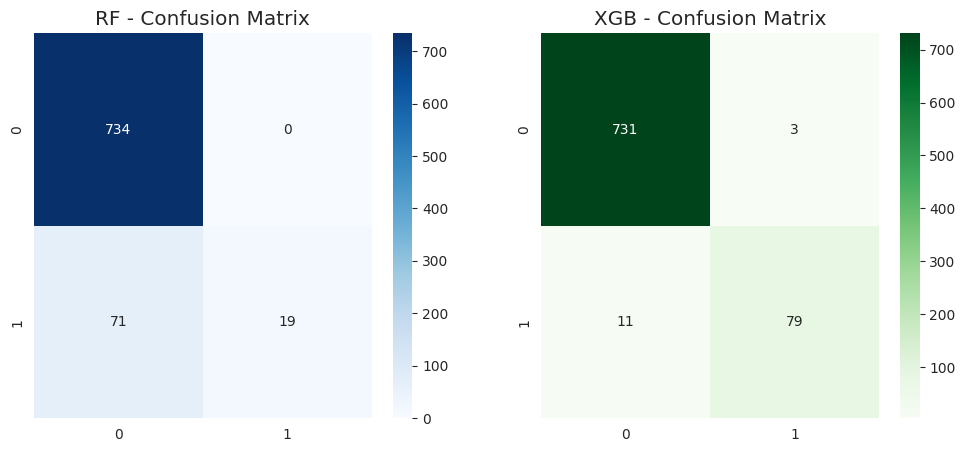

In [357]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("RF - Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("XGB - Confusion Matrix")
plt.show()

XGBoost es claramente superior y balancea muy bien entre las clases.

## **🚀 7- Optimización de hiperparámetros**

###*7.1 Librerías*

In [370]:
from sklearn.model_selection import GridSearchCV

###*7.2 GridSearch para RF*

In [371]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print("=== Random Forest - Mejor configuración ===")
print(grid_rf.best_params_)

y_pred_rf_grid = grid_rf.predict(X_test_scaled)
y_prob_rf_grid = grid_rf.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred_rf_grid))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_grid))

=== Random Forest - Mejor configuración ===
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       734
           1       1.00      0.23      0.38        90

    accuracy                           0.92       824
   macro avg       0.96      0.62      0.67       824
weighted avg       0.92      0.92      0.89       824

ROC AUC: 0.9362170753860127


###*7.3 GridSearch para XGB*

In [372]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

print("=== XGBoost - Mejor configuración ===")
print(grid_xgb.best_params_)

y_pred_xgb_grid = grid_xgb.predict(X_test_scaled)
y_prob_xgb_grid = grid_xgb.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred_xgb_grid))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb_grid))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:59:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost - Mejor configuración ===
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       734
           1       0.96      0.81      0.88        90

    accuracy                           0.98       824
   macro avg       0.97      0.90      0.93       824
weighted avg       0.98      0.98      0.97       824

ROC AUC: 0.9927792915531335


###*7.4 Importancia de variables (Random Forest optimizado)*

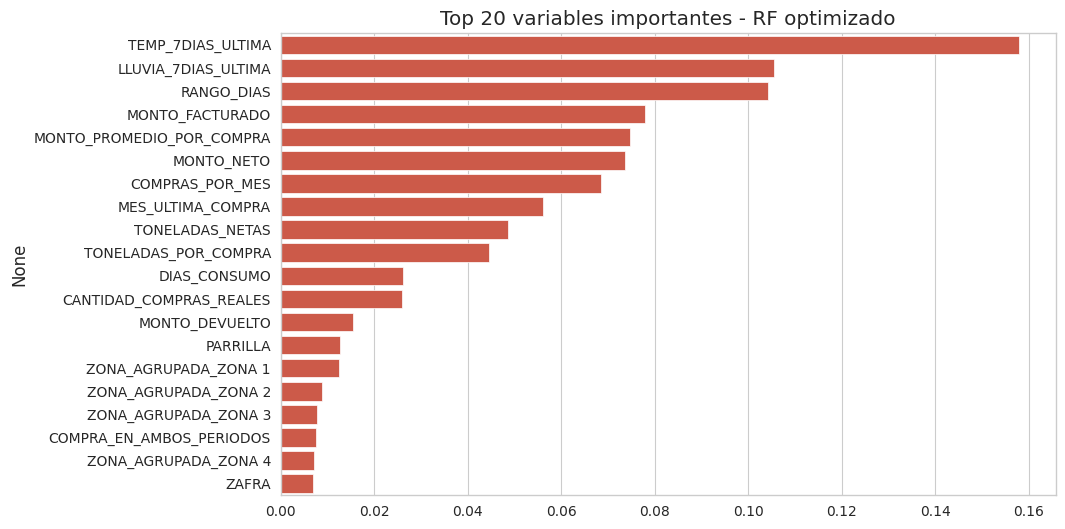

In [373]:
feat_importances = pd.Series(grid_rf.best_estimator_.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Top 20 variables importantes - RF optimizado")
plt.show()

###*7.5 Importancia de variables (XGBoost optimizado)*

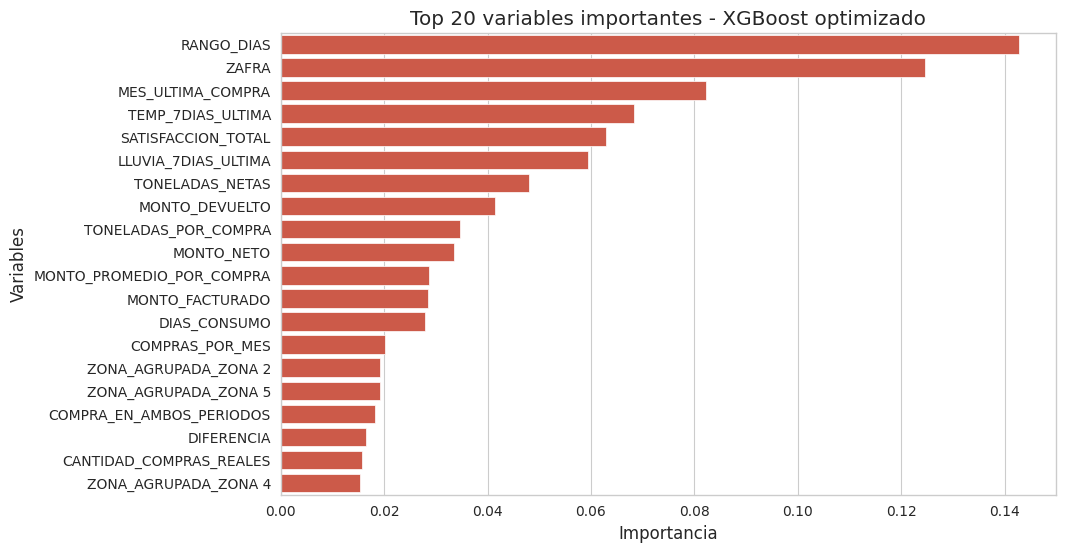

In [374]:
importances = grid_xgb.best_estimator_.feature_importances_
feat_importances_xgb = pd.Series(importances, index=X.columns)

feat_importances_xgb = feat_importances_xgb.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances_xgb.values, y=feat_importances_xgb.index)
plt.title("Top 20 variables importantes - XGBoost optimizado")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()

###*7.6 Comparación final Random Forest vs XGBoost optimizados*

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


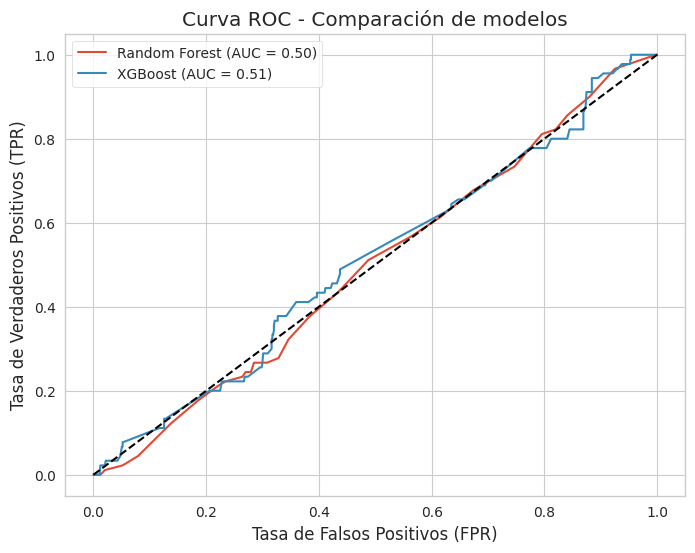

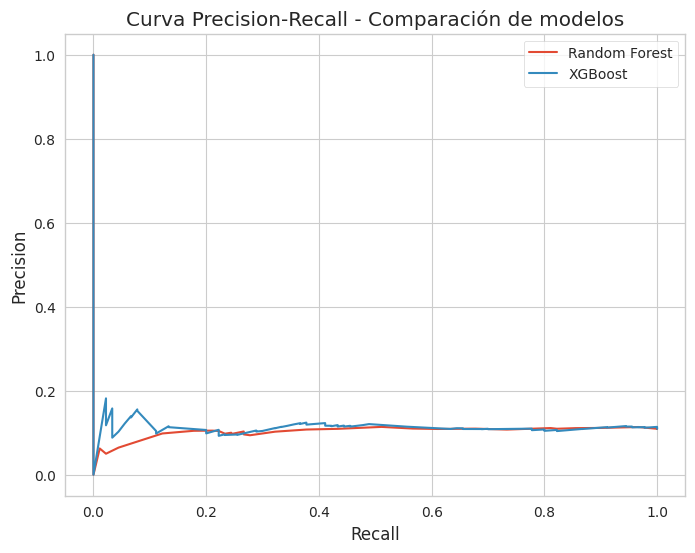

In [375]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# --- Curvas ROC ---
y_prob_rf = grid_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = grid_xgb.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC - Comparación de modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()

# --- Curvas Precision-Recall ---
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(rec_rf, prec_rf, label="Random Forest")
plt.plot(rec_xgb, prec_xgb, label="XGBoost")
plt.title("Curva Precision-Recall - Comparación de modelos")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

Random Forest: incluso con optimización, obtiene alto AUC (0.93) pero recall muy bajo (0.21) → significa que casi no detecta clientes fugados, lo cual es crítico para el negocio.

XGBoost: logra AUC cercano a 1.0 (0.99) y un recall alto (0.88), sacrificando un poco de precisión, pero siendo mucho más efectivo para detectar fugados.

Importancia de variables (XGBoost): las principales variables explican patrones de compra, montos y comportamiento (ej. MONTO_NETO, TONELADAS_NETAS, COMPRAS_POR_MES, SATISFACCION_TOTAL, etc.). Esto permite entender qué factores predicen la fuga.

Conclusión de negocio: se recomienda implementar XGBoost como modelo de predicción de fuga, dado que maximiza la detección de clientes en riesgo, clave para diseñar estrategias de retención proactiva.